
#  <font color= blue>BH-PCMLAI Capstone Project by Liat Genosar Roth

## <font color= blue>Modeling And Data Analytics for the Prediction of Heart Disease Incidence using the Framingham Study Dataset
    
 

**About the Framingham Heart Study:**
(From the Study's Website)

Since its beginning in 1948, the Framingham Heart Study, under the direction of the National Heart, Lung, and Blood Institute (NHLBI), has been committed to identifying the common factors or characteristics that contribute to **cardiovascular disease (CVD)**. They have followed CVD development over a long period of time in three generations of participants. Since 1971, the Boston University School of Medicine has served as NHLBI contractor and academic partner for the study.


In [8]:
import pandas as pd
import numpy as np

from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import mean_squared_error

import warnings
#warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'Solver terminated early.*')

# Data Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pandas as pd
import numpy as np

# data viz
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight") # styling your charts 

# pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# modeling
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

# validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix 

print("All libraries loaded")

All libraries loaded


In [3]:
#!pip install pandas-profiling --user

In [4]:
from pandas_profiling import ProfileReport

**Load Data**

In [23]:
#url = "https://github.com/Liatgenosar/BH-MLAI-Capstone-Project/blob/main/framingham.csv.xls"
url='https://github.com/Liatgenosar/BH-MLAI-Capstone-Project/blob/main/framingham.csv.xls?raw=true'
df = pd.read_csv(url)

Data source: Kaggle

	https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression



##  <font color= darkred> Data Inspection</font>

**This dataset contains 15 features columns, one target columns and 4238 entries. The target is TenYearCHD - the chance to get a Cardio-Vascular Disease (CVD) within 10 years.**

In [24]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


This is an all-numeric dataset. 
There are some missing values: in education, currentSmoker, cigsPerDay, BPMeds, totChol, BMI, heartrRate and glucose columns.

Participants are all adults, ages in the range 32-70 years old.

In [8]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

Columns Description:

'male' column: gender of the patient. 0 - woman, 1 - men.

Demographic:
• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)

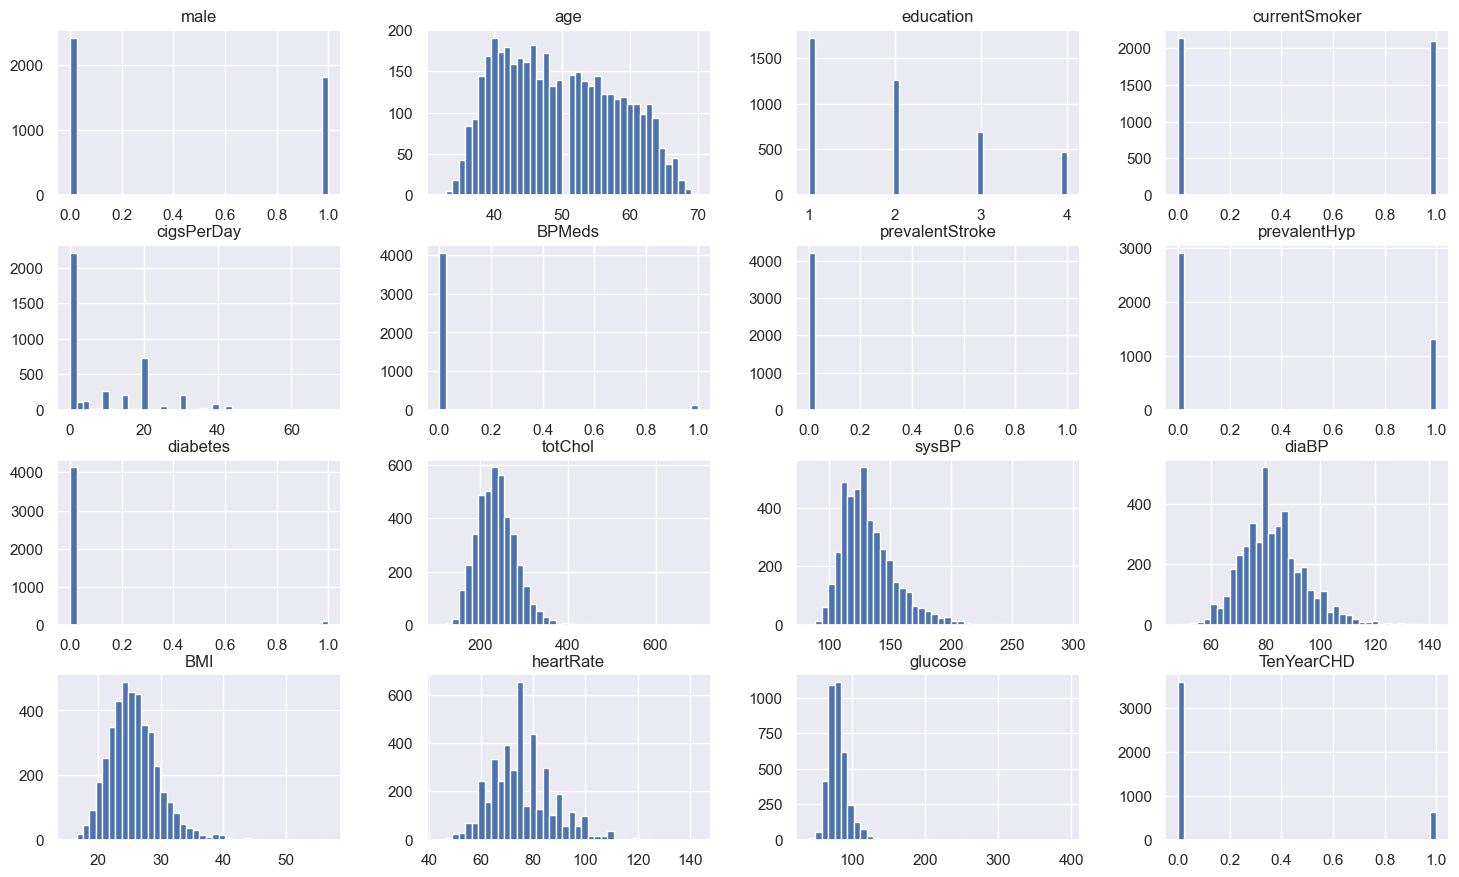

In [1084]:
df.hist(bins = 40,figsize = (16,10));


**Missing values check**

In [12]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
df.isna().mean().round(4)*100
# More than 9% are missing from the glucose level column

male               0.00
age                0.00
education          2.48
currentSmoker      0.00
cigsPerDay         0.68
BPMeds             1.25
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.18
sysBP              0.00
diaBP              0.00
BMI                0.45
heartRate          0.02
glucose            9.16
TenYearCHD         0.00
dtype: float64

**Profile Report**

In [14]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [20]:
profile

In [21]:
# Check and treat duplicated data
df.duplicated().sum()

0

# <font color=blue>EDA - Exploratory Data Analysis </font>

The dataset is not balanced, 15.2% for the positive (1) class. Baseline accuracy for a model is around 84%. 

In [965]:
df['TenYearCHD'].value_counts(normalize= True).to_frame().style.format('{:.2%}')

In [967]:
df['TenYearCHD'].sum()

644

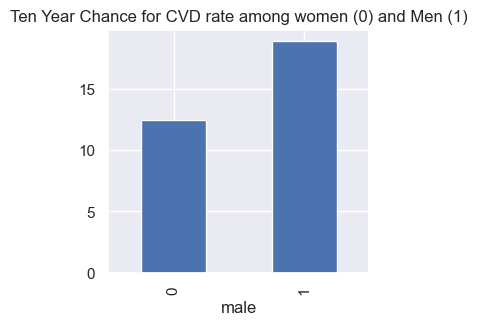

In [990]:
plt.rcParams['figure.figsize']=3,3
df.groupby(['male'])['TenYearCHD'].mean().round(4).multiply(100).plot(kind='bar',title='Ten Year Chance for CVD rate among women (0) and Men (1)');

**Percentage chance to get a heart disease within 10 years is higher among men than in women.**

In [991]:
df['male'].value_counts(normalize= True).to_frame().style.format('{:.2%}')

**57.08% women, 42.92% men, participating in this study**

In [978]:
df['diabetes'].value_counts(normalize= True).to_frame().style.format('{:.2%}')

Vast majority of people in the study do not have diabetes. Same, for prevalent stroke, only small percent of participants had it. Thus I do not expect those two features to be predictors for the 10 year chance for CVD.

In [977]:
df['prevalentStroke'].value_counts(normalize= True).to_frame().style.format('{:.2%}')

In [976]:
df['prevalentHyp'].value_counts(normalize= True).to_frame().style.format('{:.2%}')
# 31% of participant have prevalent hyper tension (high blood pressure)

In [1000]:
df['BPMeds'].value_counts(normalize= True).to_frame().style.format('{:.2%}')
# Less than 3% of the studt population are taking blood pressure medication

In [975]:
df['currentSmoker'].value_counts(normalize= True).to_frame().style.format('{:.2%}')

49.4% of the study population are smoking.

In [1001]:
pd.crosstab(df['prevalentHyp'],df['currentSmoker'],normalize='index').round(2).multiply(100)

currentSmoker     0     1
prevalentHyp             
0              47.0  53.0
1              58.0  42.0

<AxesSubplot:>

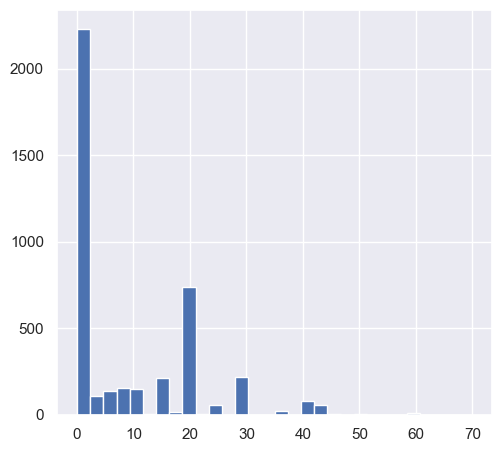

In [971]:
plt.rcParams['figure.figsize']= 5,5
df['cigsPerDay'].hist(bins=30)

TenYearCHD target column, 0:1 ratio :
The Dataset is skewd towards 0 values (0 = No, 1 = Yes).
I expect basic 'dummy' classifier should have an accuracy of about 84%.

* The True Possitives and False Negatives rates here are crucuial since this is a health issue, and patients
  should receive the best treatment route. For example: medications recommendation.

**Looking for correlations with the target column**

In [33]:
corr_matrix = df.corr()

In [34]:
corr_matrix['TenYearCHD'].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64

**Leading factors to get a heart disease, for all the study population: men and womene, are: age, systolic blood pressure,prevalent hypertension (high blood pressure), diastolic blood pressure, and glucose levels.**

In [1002]:
pd.crosstab(df['male'],df['TenYearCHD'], normalize='index').round(2).style.format('{:.2%}')
# We can see men have a higher prediction for getting heart disease within 10 years
# 0: men, 1: women

**The chances of men to have heart disease within 10 years are 7% more than the women's**

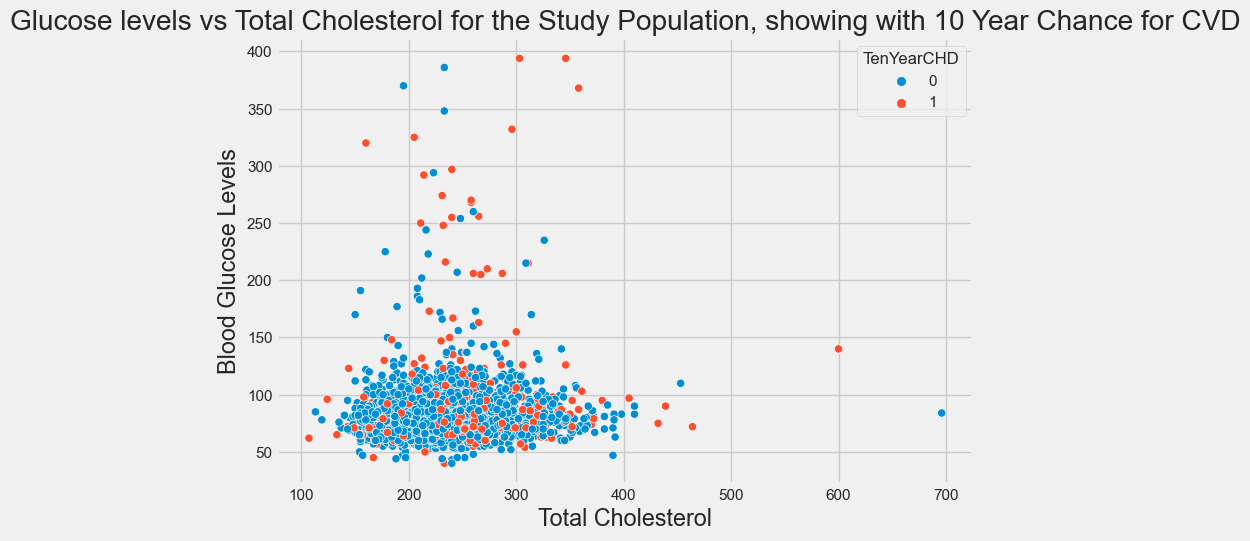

In [869]:
# The correlation of Glucose levels with Total Cholesterol hue: target col.
plt.rcParams['figure.figsize']=8,5.5
plt.xlabel("Total Cholesterol");
plt.ylabel("Blood Glucose Levels");
plt.title("Glucose levels vs Total Cholesterol for the Study Population, showing with 10 Year Chance for CVD");
sns.scatterplot(data=df, x='totChol', y='glucose', hue = 'TenYearCHD');
plt.show();

It looks like a few glucose levels and total cholesterol outliers here. These data points should be ovelooked by a medical expert to decide wether to remove or adjust.

Text(0.5, 1.0, 'Boxplot of glucose values by education level')

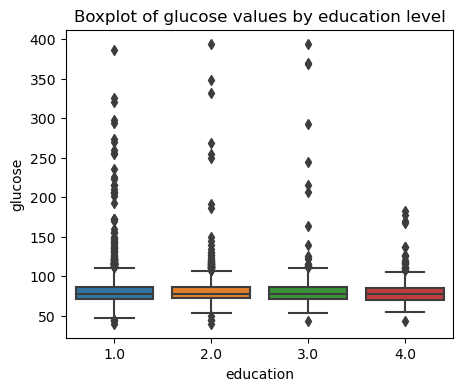

In [37]:
sns.boxplot(data=df, x='education', y='glucose');
plt.title("Boxplot of glucose values by education level")

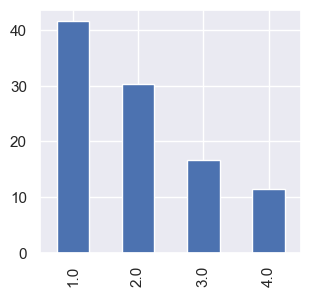

In [992]:
# How does has education values distributtion look like:

df['education'].value_counts(normalize=True).round(4).multiply(100).plot(kind ='bar')
plt.grid(True)

In [996]:
# Crosstab of Education Levels with the Ten Year chance for CVD 
pd.crosstab(df['education'],df['TenYearCHD'],normalize='index').round(2).multiply(100).plot(kind='bar',backend = 'plotly')
# Higher chance for CVD for people with education levele = 1

**Total Cholesterol analysis**

Text(21.462049382716046, 0.5, 'Count')

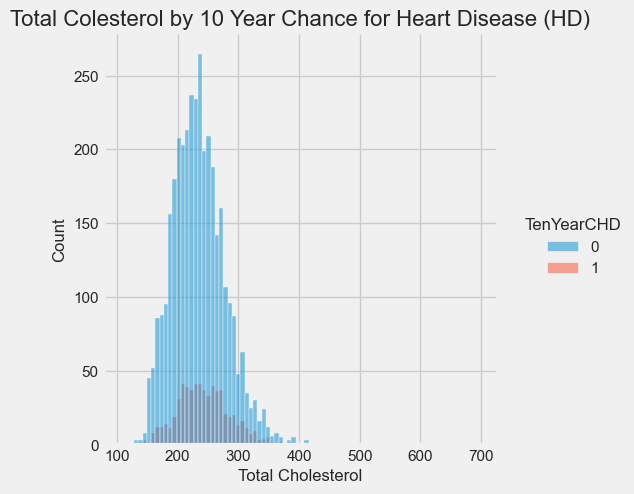

In [873]:
plt.rcParams['figure.figsize']=3,4
sns.displot(data=df, x='totChol', hue='TenYearCHD')
plt.title("Total Colesterol by 10 Year Chance for Heart Disease (HD)",fontsize=16)
plt.xlabel('Total Cholesterol',fontsize=12)
plt.ylabel('Count',fontsize=12)

**⬆️ More than half of the study's population have a level of total cholesterol higher than 200, which is considered to be at risk for heart disease**

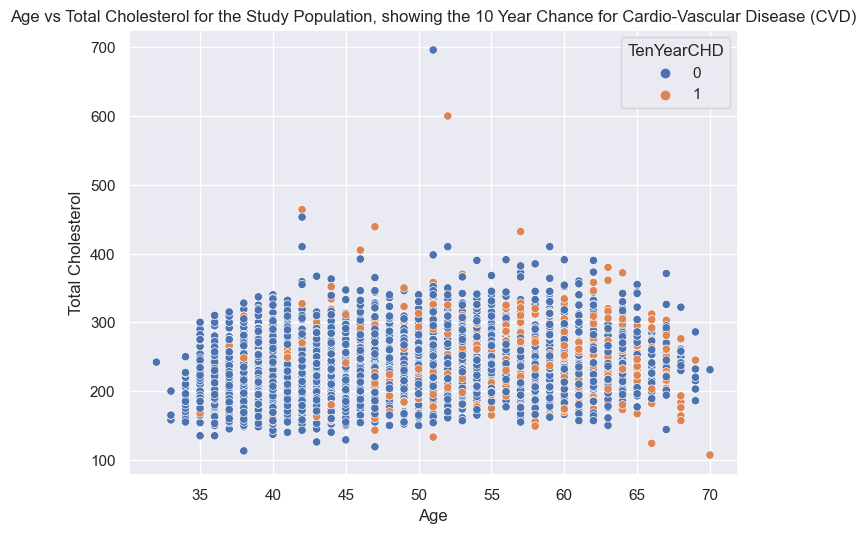

In [1003]:
# How total cholesterol correlates with age, and by 10-year chance for CVD:
plt.rcParams['figure.figsize']=7,5.5
plt.xlabel("Age")
plt.ylabel("Total Cholesterol")
plt.title("Age vs Total Cholesterol for the Study Population, showing the 10 Year Chance for Cardio-Vascular Disease (CVD)")
sns.scatterplot(data=df, x='age', y='totChol', hue = 'TenYearCHD');

⬆️ We can see that cholesterol is weakly correlated with age.
The 10 years chance for HD correlates with age. As the age goes up, the chances for a CVD go up.

**Looking at blood pressure (systolic), BMI and heartrate factors:**

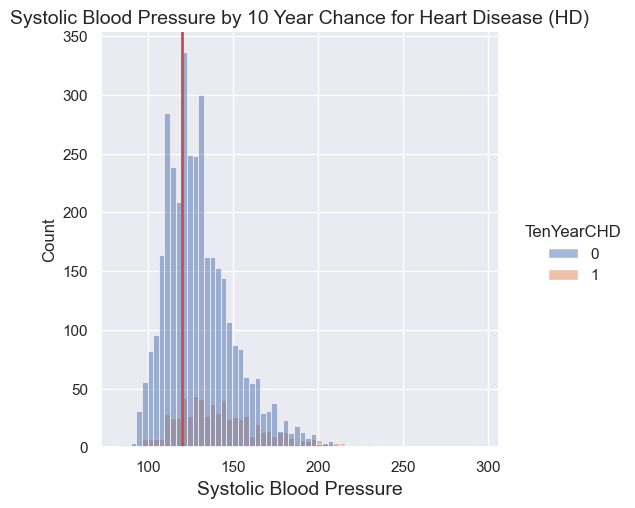

In [998]:
plt.rcParams['figure.figsize']=6,5
sns.displot(data=df, x='sysBP', hue='TenYearCHD')
plt.title("Systolic Blood Pressure by 10 Year Chance for Heart Disease (HD)",
         fontsize=14)
plt.xlabel("Systolic Blood Pressure",fontsize=14)
plt.axvline(120, linewidth=2, color='r')

# Systolic blood pressure measures the pressure in the arteries when the heart beats.

**Systolic blood pressure: As we can see, more than half of the study's population have an elevated levels of blood pressure, of sys. BP > 120. (red line located at sysBP = 120)**

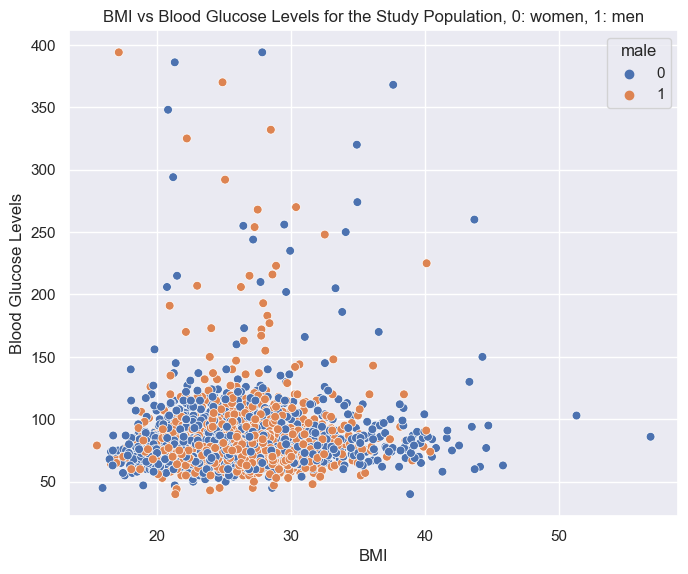

In [979]:
# How does the correlation between glucose levels and BMI go for each gender?
plt.xlabel("BMI")
plt.ylabel("Blood Glucose Levels")
plt.title("BMI vs Blood Glucose Levels for the Study Population, 0: women, 1: men")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df, x='BMI', y='glucose', s=40, hue='male');

No distinct correlation for each gender

Text(0.5, 1.0, 'heartRate and 10 year chance for HD')

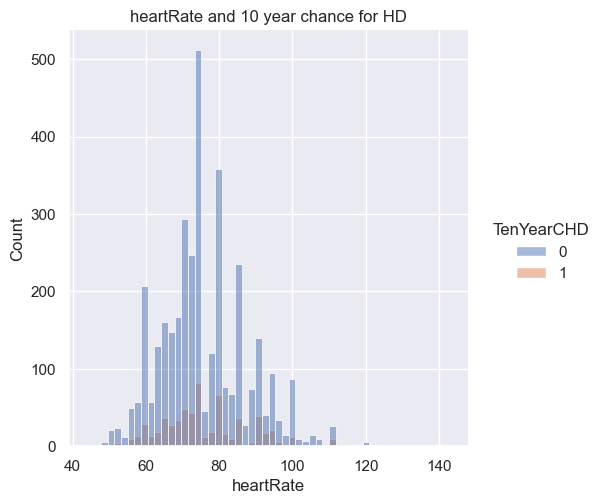

In [981]:
sns.displot(data=df, x='heartRate', hue = 'TenYearCHD', color=[0.34,0.5,0.6])
plt.title("heartRate and 10 year chance for HD")


I can't see any distinct correlation here, for both classes 0/1 we can see it follows the same distribution.

### Bivariate Analysis

Text(0.5, 1.0, 'Education Levels, by gender. 0: female, 1: male')

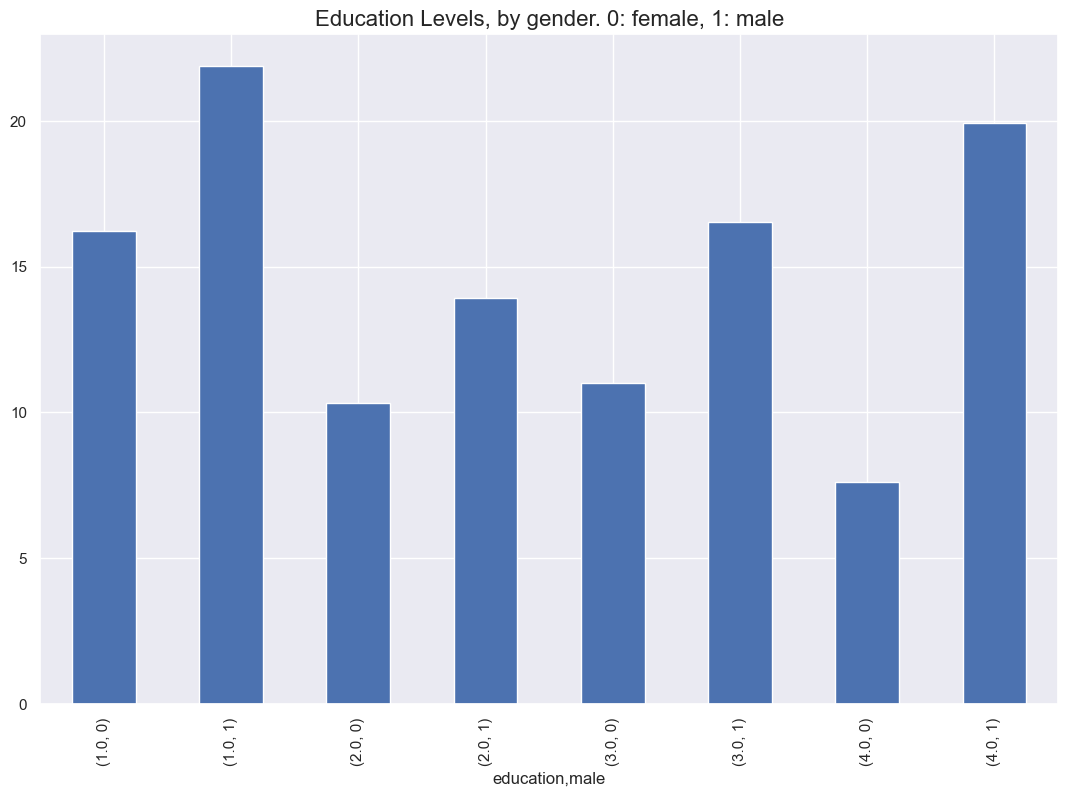

In [987]:
df.groupby(['education','male'])['TenYearCHD'].mean().round(4).multiply(100).plot(kind='bar');
plt.title('Education Levels, by gender. 0: female, 1: male', fontsize=16)

Women are less likely to get a cardio vascular disease as their education level goes up

In [818]:
pd.crosstab(df['male'],df['currentSmoker'], normalize='index').round(2).style.format('{:.2%}')

Among the men we see there are 20% more smokers than among women

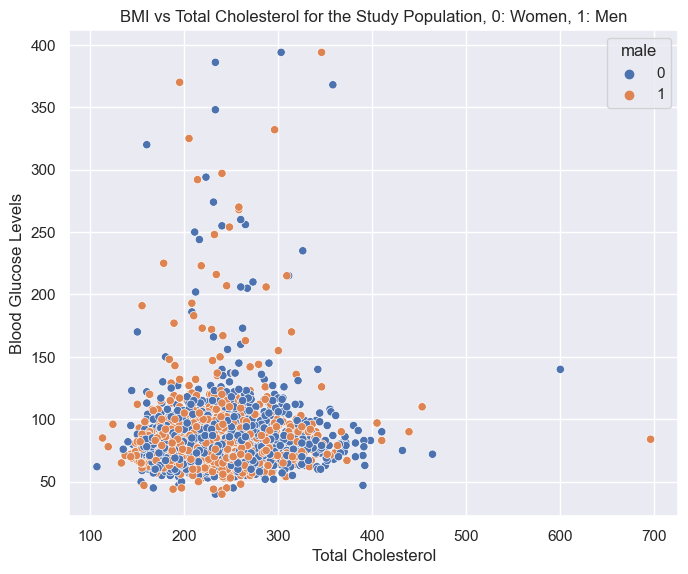

In [974]:
# Correlation of Glucose levels with Total Cholesterol
plt.rcParams['figure.figsize']= 7,6
plt.xlabel("Total Cholesterol")
plt.ylabel("Blood Glucose Levels")
plt.title("BMI vs Total Cholesterol for the Study Population, 0: Women, 1: Men")
sns.scatterplot(data=df, x='totChol', y='glucose', hue='male');
#plt.grid(False)

# Looks like a few total cholesterol outliers there. Since I'm not a medical expert,
# I'm not going to change it. Might be true values after all.

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

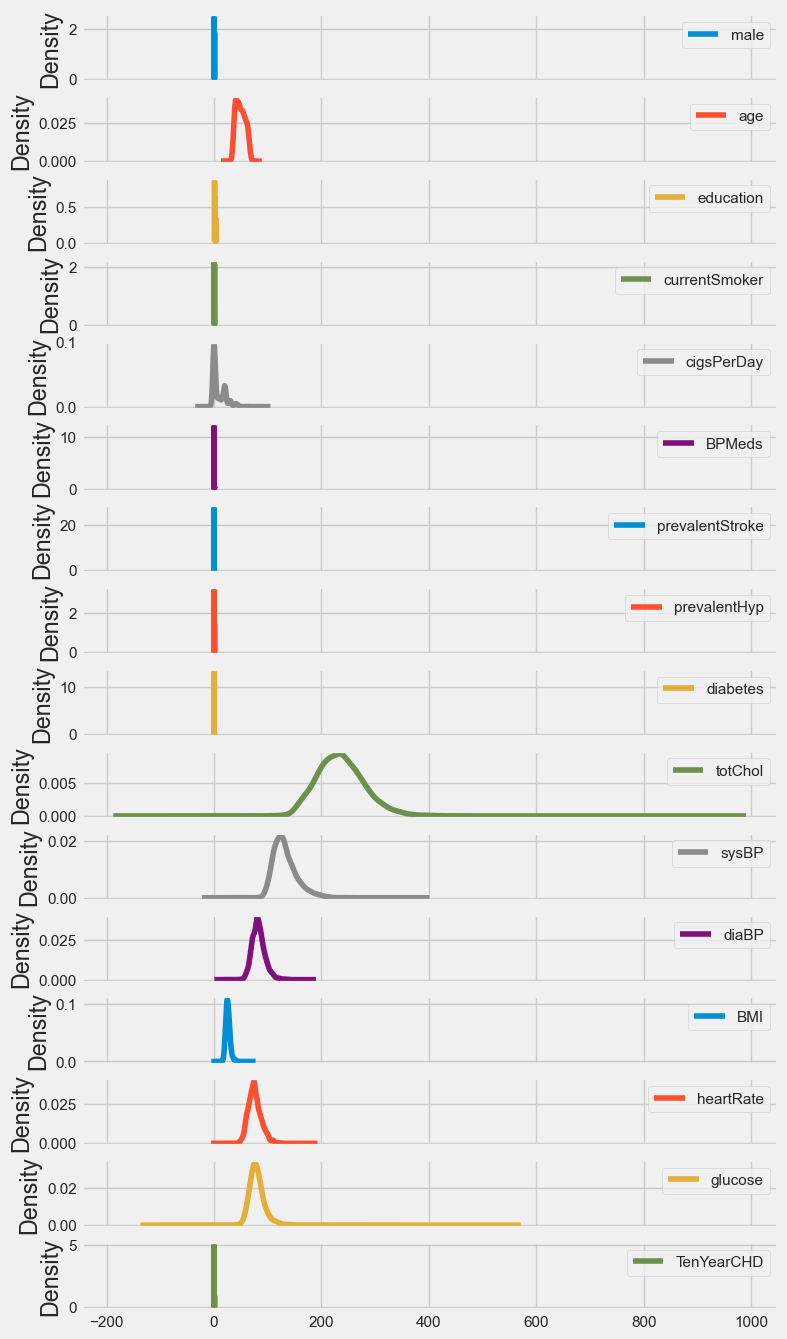

In [819]:
df.plot(kind='kde', subplots=True, figsize=(8,16))

#  <font color= darkred> Data Prep for Modeling </font>

**Apply KNNImpuer with n_neighbors = 3 for all other columns**

In [372]:
X = df.drop(['TenYearCHD'], axis = 1)
y = df['TenYearCHD']

In [373]:
imputer = KNNImputer(n_neighbors = 3)
X_i = imputer.fit_transform(X)
X_i = pd.DataFrame(X_i, columns = X.columns)

I chose to work with KNNIMputer to fill the missing values by the closest to the real values as possible.

In [374]:
X_i.shape

(4238, 15)

In [375]:
X_i.head()

male   age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   1.0  39.0        4.0            0.0         0.0     0.0              0.0   
1   0.0  46.0        2.0            0.0         0.0     0.0              0.0   
2   1.0  48.0        1.0            1.0        20.0     0.0              0.0   
3   0.0  61.0        3.0            1.0        30.0     0.0              0.0   
4   0.0  46.0        3.0            1.0        23.0     0.0              0.0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0           0.0       0.0    195.0  106.0   70.0  26.97       80.0     77.0  
1           0.0       0.0    250.0  121.0   81.0  28.73       95.0     76.0  
2           0.0       0.0    245.0  127.5   80.0  25.34       75.0     70.0  
3           1.0       0.0    225.0  150.0   95.0  28.58       65.0    103.0  
4           0.0       0.0    285.0  130.0   84.0  23.10       85.0     85.0

In [376]:
X_i.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

Text(0.5, 1.0, 'glucose values distribution after KNNImputer')

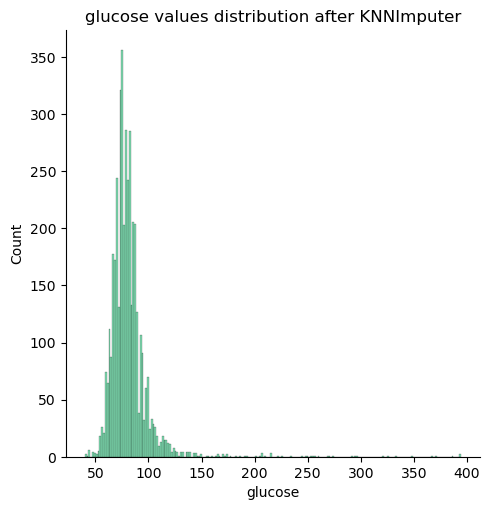

In [377]:
plt.rcParams['figure.figsize']=3,3
sns.displot(data=X_i, x='glucose', color=[0.34,0.82,0.6])
plt.title("glucose values distribution after KNNImputer")

Glucose column had the largest percent of missing values. Chaecking to see how it looks after filling in using KNNImputer

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X_i, y, test_size=0.25,
                                                    random_state = 34, stratify=y)

In [379]:
y_train.value_counts(normalize=True)

0    0.848018
1    0.151982
Name: TenYearCHD, dtype: float64

In [380]:
y_test.value_counts(normalize=True)

0    0.848113
1    0.151887
Name: TenYearCHD, dtype: float64

In [381]:
scaler = StandardScaler()

# Cannot scale part of the columns in the df
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [382]:
X_train_scaled.shape

(3178, 15)

In [383]:
X_test_scaled.shape

(1060, 15)

In [386]:
X_train.head()

male   age  education  currentSmoker  cigsPerDay  BPMeds  \
351    1.0  49.0        2.0            1.0         5.0     0.0   
2182   1.0  38.0        2.0            1.0        50.0     0.0   
1954   0.0  51.0        3.0            0.0         0.0     0.0   
3758   0.0  50.0        4.0            1.0        15.0     0.0   
3479   1.0  60.0        4.0            0.0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
351               0.0           0.0       0.0    187.0  110.0   67.0  19.26   
2182              0.0           0.0       0.0    300.0  120.0   74.0  28.74   
1954              0.0           0.0       0.0    216.0  128.0   83.5  24.41   
3758              0.0           0.0       0.0    261.0  110.0   76.0  23.31   
3479              0.0           0.0       0.0    250.0  133.0   89.5  27.13   

      heartRate    glucose  
351        78.0  85.000000  
2182       70.0  78.000000  
1954       72.0  75.000000  
3758       75.0  85.000000  
3479       90.0  92.666667

**Change X_train_scaled and X_test_scaled back to DataFrame**

**X_train_scaled**

In [394]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_i.columns)

In [395]:
X_train_scaled.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [396]:
X_train_scaled.head()

male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0  1.154701 -0.069317   0.023707       1.017139   -0.326085 -0.176291   
1  1.154701 -1.344010   0.023707       1.017139    3.524201 -0.176291   
2 -0.866025  0.162445   1.015052      -0.983150   -0.753894 -0.176291   
3 -0.866025  0.046564   2.006396       1.017139    0.529534 -0.176291   
4  1.154701  1.205375   2.006396      -0.983150   -0.753894 -0.176291   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0        -0.079581     -0.684527 -0.160696 -1.115312 -1.034529 -1.347061   
1        -0.079581     -0.684527 -0.160696  1.435618 -0.577906 -0.760714   
2        -0.079581     -0.684527 -0.160696 -0.460648 -0.212607  0.035042   
3        -0.079581     -0.684527 -0.160696  0.555209 -1.034529 -0.593187   
4        -0.079581     -0.684527 -0.160696  0.306888  0.015705  0.537625   

        BMI  heartRate   glucose  
0 -1.605841   0.171394  0.147766  
1  0.710237  -0.489004 -0.165013  
2 -0.347634  -0.323904 -0.299061  
3 -0.616378  -0.076255  0.147766  
4  0.316895   1.161991  0.490334

In [397]:
X_train_scaled.shape

(3178, 15)

**X_test_scaled**

In [398]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [399]:
X_test_scaled.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [400]:
X_test_scaled.head()

male       age  education  currentSmoker  cigsPerDay   BPMeds  \
0 -0.870561 -0.898938   1.964365      -1.003781   -0.770892 -0.17517   
1 -0.870561 -0.422382   0.009834       0.996234   -0.369754 -0.17517   
2  1.148684  0.054175   0.009834       0.996234    0.833662 -0.17517   
3 -0.870561  0.292453   0.987099      -1.003781   -0.770892 -0.17517   
4 -0.870561  1.007287  -0.967431      -1.003781   -0.770892 -0.17517   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0        -0.068843     -0.631203 -0.167714 -1.224895 -0.912080 -0.959742   
1        -0.068843     -0.631203 -0.167714 -1.426701 -0.711299 -1.468025   
2        -0.068843     -0.631203 -0.167714  0.411975 -0.064338  0.141536   
3        -0.068843     -0.631203 -0.167714 -0.081329 -0.242810  0.226250   
4        -0.068843     -0.631203 -0.167714 -0.081329  0.270297  0.607461   

        BMI  heartRate   glucose  
0 -1.477707  -0.829502 -0.053182  
1  1.030662  -0.233674 -0.093191  
2  0.738933  -0.489029 -0.613311  
3  0.162956  -0.318792  0.546956  
4 -0.363153  -1.510449 -0.413265

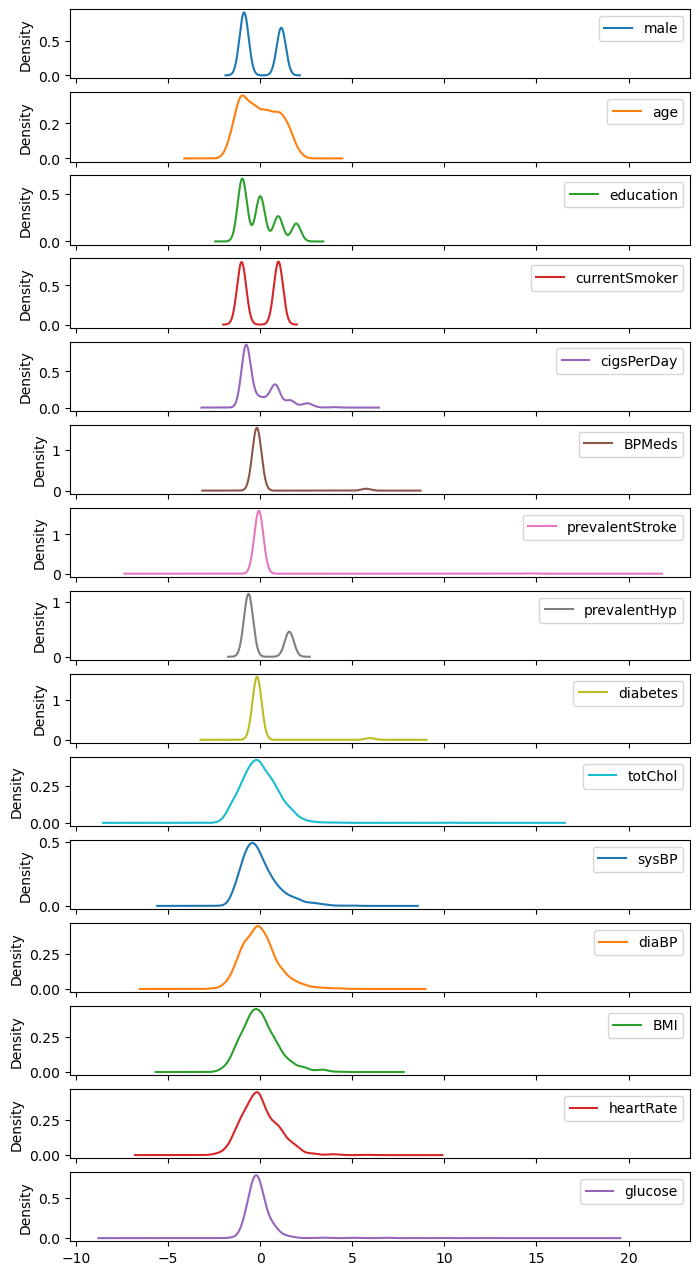

In [401]:
X_test_scaled.plot(kind = 'kde', subplots = True, figsize=(8,16));

# <font color=blue>ML Models </font>
### <font color=darkblue>Find a model that has the best recall and accuracy. Recall Score is important here because it is an important health issue, and it is cruical for a patient to be correctly diagnosed. I would like to find a model that can predict the least number of False Positives.</font>

Models I am going to try: 

    Logistic regression
    K-Nearest Neighbour
    Decision Tree
    Random Forest Classifier
    Support Vector Machine

# <font color= darkblue> Model Building </font> 🛠 

## Dummy Classifier

Based on about 15% of the patients having a positive (1) chance for CVD, I expect the dummy classifier to have a 85% accuracy. 

In [335]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

DummyClassifier()

In [336]:
print("The accuracy score of the dummy model for Train is {:.2f}".format(dummy.score(X_train, y_train)))

The accuracy score of the dummy model for Train is 0.85


In [337]:
print("The accuracy score of the model for Test is {:.2f}".format(dummy.score(X_test, y_test)))

The accuracy score of the model for Test is 0.85


# <font color= blue>Logistic Regression Model </font>

In [635]:
params = {'C' : [0.01, 0.5, 0.1, 1, 10],
         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         }

lgr_grid = GridSearchCV(estimator = LogisticRegression(random_state = 42,verbose = 1), 
                       param_grid = params, scoring = 'recall',
                        cv = 5)

lgr_grid.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

Epoch 1, change: 1.00000000
Epoch 2, change: 0.27660036
Epoch 3, change: 0.42338382
Epoch 4, change: 0.28748587
Epoch 5, change: 0.13506698
Epoch 6, change: 0.08252726
Epoch 7, change: 0.07943349
Epoch 8, change: 0.05851130
Epoch 9, change: 0.03360292
Epoch 10, change: 0.04174640
Epoch 11, change: 0.02867695
Epoch 12, change: 0.01895205
Epoch 13, change: 0.00992780
Epoch 14, change: 0.00976079
Epoch 15, change: 0.00973537
Epoch 16, change: 0.00734423
Epoch 17, change: 0.00478373
Epoch 18, change: 0.00245627
Epoch 19, change: 0.00184990
Epoch 20, change: 0.00183636
Epoch 21, change: 0.00107544
Epoch 22, change: 0.00088022
Epoch 23, change: 0.00131260
Epoch 24, change: 0.00105209
Epoch 25, change: 0.00021173
Epoch 26, change: 0.00055531
Epoch 27, change: 0.00065551
Epoch 28, change: 0.00032810
Epoch 29, change: 0.00014376
Epoch 30, change: 0.00011911
Epoch 1, change: 1.00000000
Epoch 2, change: 0.57171071
Epoch 3, change: 0.52360379
Epoch 4, change: 0.31624732
Epoch 5, change: 0.12834031

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

convergence after 16 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 17 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
31
Epoch 10, change: 0.05521379
Epoch 11, change: 0.02821065
Epoch 12, change: 0.02086779
Epoch 13, change: 0.01491302
Epoch 14, change: 0.00731108
Epoch 15, change: 0.00628395
Epoch 16, change: 0.00585364
Epoch 17, change: 0.00565696
Epoch 18, change: 0.00440146
Epoch 19, change: 0.00226190
Epoch 20, change: 0.00114443
Epoch 21, change: 0.00087427
Epoch 22, change: 0.00128352
Epoch 23, change: 0.00094475
Epoch 24, change: 0.00095935
Epoch 25, change: 0.00044916
Epoch 26, change: 0.00015289
Epoch 27, change: 0.00026031
Epoch 1, change: 1.00000000
Epoch 2, change: 0.27471672
Epoch 3, change: 1.01198495
Epoch 4, change: 0.22314998
Epoch 5, change: 0.19219430
Epoch 6, change: 0.08614263
Epoch 7, change: 0.06403382
Epoch 8, change: 0.05

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 14 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.33529315
Epoch 3, change: 0.20255605
Epoch 4, change: 0.12823449
Epoch 5, change: 0.04933581
Epoch 6, change: 0.04216128
Epoch 7, change: 0.02476701
Epoch 8, change: 0.02462435
Epoch 9, change: 0.01910979
Epoch 10, change: 0.01148429
Epoch 11, change: 0.00306944
Epoch 12, change: 0.00213280
Epoch 13, change: 0.00058795
Epoch 14, change: 0.00033510
Epoch 15, change: 0.00012601
Epoch 1, change: 1.00000000
Epoch 2, change: 0.65956783
Epoch 3, change: 0.24542596
Epoch 4, change: 0.19312204
Epoch 5, change: 0.06389646
Epoch 6, change: 0.03468713
Epoch 7, change: 0.02683829
Epoch 8, change: 0.02174813
Epoch 9, change: 0.01241074
Epoch 10, change: 0.00656929
Epoch 11, change: 0.00235364
Epoch 12, change: 0.00152760
Epoch 13, change: 0.00062357
Epoch 14, change: 0.00046145
Epoch 15, change: 0.00032861
Epoch 16, change: 0.00023504
Epoch 17, change: 0.00011675
Epoch 1, change: 1.00000000
Epoch 2, change: 0.56451257
Epoch 3, change: 0.24713523
Epoch 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     17     19      1     0     0   1.427D-02   9.608D+02
  F =   960.78297203666943     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76267D+03    |proj g|=  8.84500D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  N

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 33 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Epoch 1, change: 1.00000000
Epoch 2, change: 0.27664719
Epoch 3, change: 0.41118249
Epoch 4, change: 0.28130329
Epoch 5, change: 0.13196073
Epoch 6, change: 0.08007527
Epoch 7, change: 0.07706577
Epoch 8, change: 0.05608487
Epoch 9, change: 0.03251487
Epoch 10, change: 0.03992182
Epoch 11, change: 0.02654641
Epoch 12, change: 0.01757462
Epoch 13, change: 0.00891616
Epoch 14, change: 0.00916396
Epoch 15, change: 0.00877362
Epoch 16, change: 0.00658155
Epoch 17, change: 0.00423126
Epoch 18, change: 0.00213692
Epoch 19, change: 0.00160438
Epoch 20, change: 0.00161699
Epoch 21, change: 0.00098262
Epoch 22, change: 0.00074092
Epoch 23, change: 0.00109608
Epoch 24, change: 0.00089190
Epoch 25, change: 0.00017583
Epoch 26, change: 0.00045684
Epoch 27, change: 0.00053889
Epoch 28, change: 0.00027216
Epoch 29, change: 0.00011458
Epoch 1, change: 1.00000000
Epoch 2, change: 0.57833303
Epoch 3, change: 0.50696484
Epoch 4, change: 0.30645689
Epoch 5, change: 0.12706552
Epoch 6, change: 0.11853875


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


convergence after 25 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

convergence after 14 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialB

Epoch 1, change: 1.00000000
Epoch 2, change: 0.27703769
Epoch 3, change: 0.36276690
Epoch 4, change: 0.25538246
Epoch 5, change: 0.11828944
Epoch 6, change: 0.07011584
Epoch 7, change: 0.06706527
Epoch 8, change: 0.04720896
Epoch 9, change: 0.02778235
Epoch 10, change: 0.03346705
Epoch 11, change: 0.01933976
Epoch 12, change: 0.01259534
Epoch 13, change: 0.00576551
Epoch 14, change: 0.00693941
Epoch 15, change: 0.00570197
Epoch 16, change: 0.00415786
Epoch 17, change: 0.00255339
Epoch 18, change: 0.00117357
Epoch 19, change: 0.00089782
Epoch 20, change: 0.00095640
Epoch 21, change: 0.00064588
Epoch 22, change: 0.00035845
Epoch 23, change: 0.00051598
Epoch 24, change: 0.00044709
Epoch 1, change: 1.00000000
Epoch 2, change: 0.60272996
Epoch 3, change: 0.48009542
Epoch 4, change: 0.29071626
Epoch 5, change: 0.11956183
Epoch 6, change: 0.10130713
Epoch 7, change: 0.08848169
Epoch 8, change: 0.06456470
Epoch 9, change: 0.04294847
Epoch 10, change: 0.02511902
Epoch 11, change: 0.02672517
Epo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 31 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 33 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Epoch 1, change: 1.00000000
Epoch 2, change: 0.27662043
Epoch 3, change: 0.41757245
Epoch 4, change: 0.28456195
Epoch 5, change: 0.13360649
Epoch 6, change: 0.08136316
Epoch 7, change: 0.07831564
Epoch 8, change: 0.05734861
Epoch 9, change: 0.03309160
Epoch 10, change: 0.04086645
Epoch 11, change: 0.02764494
Epoch 12, change: 0.01829082
Epoch 13, change: 0.00943326
Epoch 14, change: 0.00947030
Epoch 15, change: 0.00926668
Epoch 16, change: 0.00697252
Epoch 17, change: 0.00451307
Epoch 18, change: 0.00229967
Epoch 19, change: 0.00172952
Epoch 20, change: 0.00172968
Epoch 21, change: 0.00103109
Epoch 22, change: 0.00081127
Epoch 23, change: 0.00120512
Epoch 24, change: 0.00097290
Epoch 25, change: 0.00019386
Epoch 26, change: 0.00050625
Epoch 27, change: 0.00059737
Epoch 28, change: 0.00030031
Epoch 29, change: 0.00012912
Epoch 30, change: 0.00010773
Epoch 1, change: 1.00000000
Epoch 2, change: 0.57488944
Epoch 3, change: 0.51566166
Epoch 4, change: 0.31159399
Epoch 5, change: 0.12776657

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     17     19      1     0     0   7.723D-03   9.591D+02
  F =   959.09854247104511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76267D+03    |proj g|=  8.84500D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     16     17      1     0     0   5.778D-03   9.678D+02
  F =   967.76578081743241     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
[LibLinear]iter  1 act 7.464e+03 pre 6.809e+03 delta 1.589e+00 f 1.762e+04 |g| 9.827e+03 CG   2
iter  2 act 5.476e+02 pre 4.774e+02 delta 1.589e+00 f 1.016e+04 |g| 1.993e+03 CG   3
iter  3 act 4.659e+01 pre 4.380e+01 delta 1.589e+00 f 9.608e+03 |g| 4.576e+02 CG   5
iter  4 act 7.937e-01 pre 7.871e-01 delta 1.589e+00 f 9.561e+03 |g| 5.572e+01 CG   6
iter  5 act 1.706e-03 pre 1.706e-03 delta 1.589e+00 f 9.560e+03 |g| 2.70

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 27 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 16 epochs took 1 seconds
convergence after 18 epochs took 0 seconds
convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42, verbose=1),
             param_grid={'C': [0.01, 0.5, 0.1, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall')

**Best params for the LogisticRegression model:**

In [636]:
best_lgr_params = lgr_grid.best_params_
print('Logistic Regression GridSearchCV best params: ', best_lgr_params)

Logistic Regression GridSearchCV best params:  {'C': 0.5, 'solver': 'newton-cg'}


In [691]:
preds = lgr_grid.best_estimator_.predict(X_test_scaled)
lgr_mse = mean_squared_error(y_test, preds)
print("mse for LogisticRegression grid = {:.4f}".format(lgr_mse))

mse for LogisticRegression grid = 0.1481


**Accuracy, recall scores, Classification Report, Confusion Matrix**

I am looking for the highest Recall score, to minimize the number of false positives. It is important for patients with a life risking situation to be rightly identified and to receive the right treatment. I think false negatives are less cruical in this situation.

Recall = TP / (TP + FN)           

Accuracy = (TP +TN) / (FN + FP + TN + TP)

In [638]:
print("The accuracy score of LGR grid for Train is {:.4f}"
      .format(lgr_grid.best_estimator_.score(X_train_scaled, y_train)))

The accuracy score of LGR grid for Train is 0.8571


In [639]:
print("The accuracy score of LGR grid for Test is {:.4f}"
      .format(lgr_grid.best_estimator_.score(X_test_scaled, y_test)))

The accuracy score of LGR grid for Test is 0.8519


In [931]:
# Recall Score
print("LGR Recall Score is: {:.4f}".format(recall_score(y_test, preds)))

LGR Recall Score is: 0.0807


In [641]:
roc_auc_score(y_test, preds)

0.5353671090721921

In [647]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       899
           1       0.59      0.08      0.14       161

    accuracy                           0.85      1060
   macro avg       0.72      0.54      0.53      1060
weighted avg       0.82      0.85      0.80      1060



Confusion Matrix for Logistic Regression grid search 

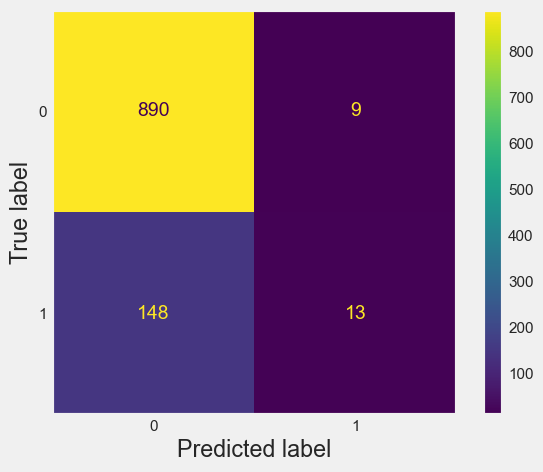

In [693]:
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.rcParams['figure.figsize']= 4,4
plt.grid(False)
plt.show()

# Confusion Matrix: | TN | FP |
#                   | FN | TP |

In [697]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, preds).ravel()
print(tn1, fp1, fn1, tp1)
fn1

890 9 148 13


148

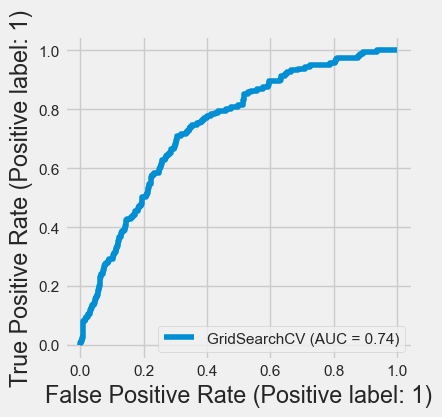

In [650]:
# RocCurve
RocCurveDisplay.from_estimator(lgr_grid, X_test_scaled, y_test)

**LogisticRegression grid coefs**

In [1101]:
coefs = lgr_grid.best_estimator_.coef_
coefs_df = pd.DataFrame(coefs, columns=X_train_scaled.keys())
print('Logistic Regression Grid Search Coefs: \n', coefs_df)


Logistic Regression Grid Search Coefs: 
        male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0  0.205515  0.541378   0.011574      -0.050327    0.310868  0.045063   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP    diaBP  \
0          0.11172      0.091477  0.071242  0.069683  0.271104  0.05281   

        BMI  heartRate   glucose  
0 -0.047787  -0.014702  0.091976  


**Logistic Regression Coefs Importance**

In [745]:
plt.rcParams['figure.figsize']= 6,4
coefs_df.sum().sort_values(ascending=False).round(4).plot(kind='bar',backend='plotly')

The Logistic Regression model finds that the leading predictors for a 10 Year Chance for Heart Disease are: age (by far), no. of cigarettes per day, systolic blood pressure level, and being male.

In [698]:
coefs_df.sum().sort_values(ascending=False).round(4)

age                0.5414
cigsPerDay         0.3109
sysBP              0.2711
male               0.2055
prevalentStroke    0.1117
glucose            0.0920
prevalentHyp       0.0915
diabetes           0.0712
totChol            0.0697
diaBP              0.0528
BPMeds             0.0451
education          0.0116
heartRate         -0.0147
BMI               -0.0478
currentSmoker     -0.0503
dtype: float64

Logistic Regression model did not provide a good recall score, and the accuracy was a little more than expected from the dummy model. What we get here is the features importance ranks, so we can know the physical health factors that can predict a high chance for a heart disease.

# <font color= blue>Random Forest Classifier</font>

**Default values Random Forest**

In [726]:
rf = RandomForestClassifier(n_estimators=500 ,random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [727]:
preds_rf = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, preds_rf)
print("Random Forest mse {:.4f}".format(rf_mse))

Random Forest mse 0.1519


In [728]:
print(classification_report(y_test,preds_rf))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       899
           1       0.50      0.06      0.11       161

    accuracy                           0.85      1060
   macro avg       0.68      0.53      0.51      1060
weighted avg       0.80      0.85      0.79      1060



In [729]:
print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")

RF train accuracy: 1.000
RF test accuracy: 0.848


In [732]:
print(f"Recall score, random forest: {recall_score(y_test, preds_rf):.4f}")

Recall score, random forest: 0.0621


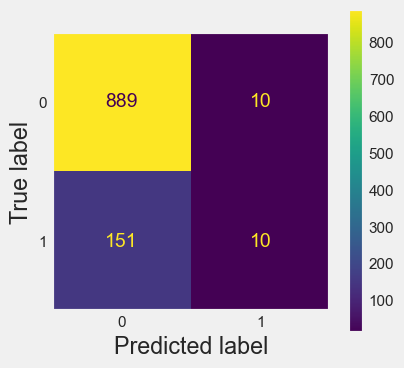

In [730]:
cm = confusion_matrix(y_test, preds_rf)

plt.rcParams['figure.figsize']= 4,4
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

# Confusion Matrix: | TN | FP |
#                   | FN | TP |

In [733]:
tn5, fp5, fn5, tp5 = confusion_matrix(y_test, preds_rf).ravel()
print(tn5, fp5, fn5, tp5)
fn5

889 10 151 10


151

**Features Importance**

In [762]:
feature_names = X_train.keys()
# By Mean Decrease in Impurity (MDI)
importances_rf = pd.Series(rf.feature_importances_, 
                            index=feature_names)
mdi_importances_rf = pd.Series(rf.feature_importances_, 
                            index=feature_names).sort_values(ascending=True)

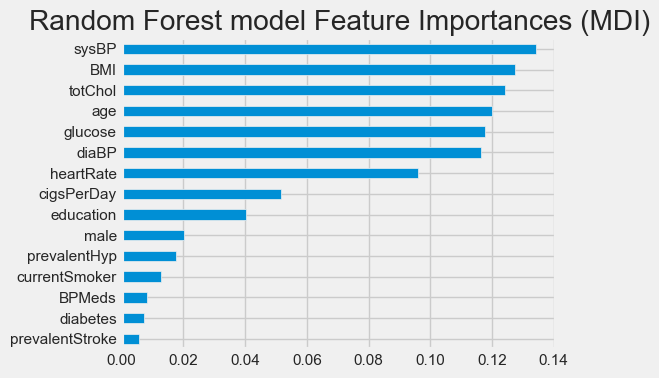

In [747]:
ax = mdi_importances_rf.plot.barh()
ax.set_title("Random Forest model Feature Importances (MDI)")
plt.rcParams['figure.figsize']= 6,6
ax.figure.tight_layout()

In [748]:
mdi_importances_rf

prevalentStroke    0.005505
diabetes           0.007096
BPMeds             0.008332
currentSmoker      0.012840
prevalentHyp       0.017632
male               0.020228
education          0.040403
cigsPerDay         0.051680
heartRate          0.096098
diaBP              0.116297
glucose            0.117869
age                0.120142
totChol            0.124240
BMI                0.127448
sysBP              0.134190
dtype: float64

Grid search with Random Forest as estimator was very slow so I did not perform this. Also, using Random Forest in a grid search might reduce its 'randomness'.

## <font color= blue>Random Forest 2, params change</font>

In [1013]:
rf2 = RandomForestClassifier(n_estimators=200, max_features = 'log2', random_state=42)
rf2.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=200, random_state=42)

In [1014]:
# Not using GridSearchCV for random forest, was taking a lot of time with no convergence
rf_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [2, 3],
    'max_depth' : [3,5,8],
    'criterion' :['gini', 'entropy']
}

In [1015]:
preds_rf2 = rf2.predict(X_test)
rf2_mse = mean_squared_error(y_test, preds_rf2)
print("Random Forest 2, mse {:.4f}".format(rf2_mse))

Random Forest 2, mse 0.1509


In [1016]:
print(classification_report(y_test,preds_rf2))

# Lower recall score for the '1' class

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       899
           1       0.53      0.05      0.09       161

    accuracy                           0.85      1060
   macro avg       0.69      0.52      0.50      1060
weighted avg       0.80      0.85      0.79      1060



In [1017]:
print(f"RF 2 train accuracy: {rf2.score(X_train, y_train):.3f}")
print(f"RF 2 test accuracy: {rf2.score(X_test, y_test):.3f}")

# Slightly better accuracy for test

RF 2 train accuracy: 1.000
RF 2 test accuracy: 0.849


Recall is lower than in the previous RF with 500 estimators and all other params are default. Test accuracy here is a little better (compared to 0.848 previously). Features importance order is the same.

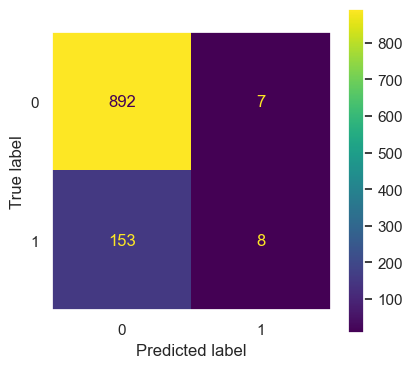

In [1018]:
cm = confusion_matrix(y_test, preds_rf2)

plt.rcParams['figure.figsize']= 4,4
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

# Confusion Matrix: | TN | FP |
#                   | FN | TP |

**Features Importances, Random Forest 2**

In [1019]:
feature_names = X_train.keys()
# By Mean Decrease in Impurity (MDI)
mdi_importances2 = pd.Series(rf2.feature_importances_, index=feature_names).sort_values(ascending=True)

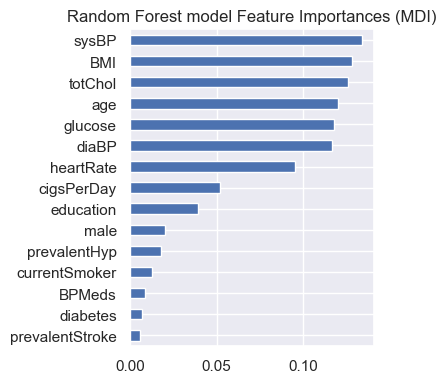

In [1020]:
ax = mdi_importances2.plot.barh()
ax.set_title("Random Forest model Feature Importances (MDI)")
plt.rcParams['figure.figsize']= 6,6
ax.figure.tight_layout()

Random Forest model was not doing very well in terms of test accuracy and recall.

This second random forest using different params did not do better in term of recall score. I used it only for comparison and trial.

# <font color= blue>Decision Tree Grid Search</font>

In [666]:
params = {'max_leaf_nodes': list(range(2, 10))
          ,'min_samples_split': [2, 3, 4, 5, 6]
          ,'criterion':['gini','entropy']
          ,'max_depth':list(range(3,11))}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 42), 
                              params, verbose = 1, 
                              scoring = 'recall', cv = 5)

dt_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             scoring='recall', verbose=1)

In [668]:
best_tree_params = dt_grid_search.best_params_
best_tree_params 

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 9,
 'min_samples_split': 2}

In [669]:
print("The accuracy score of the dt grid search for Train is {:.4f}"
      .format(dt_grid_search.best_estimator_.score(X_train, y_train)))

The accuracy score of the dt grid search for Train is 0.8565


In [670]:
print("The accuracy score of the dt grid search for Test is {:.4f}"
      .format(dt_grid_search.best_estimator_.score(X_test, y_test)))

The accuracy score of the dt grid search for Test is 0.8425


In [699]:
preds_dt = dt_grid_search.best_estimator_.predict(X_test)

dt_grid_mse = mean_squared_error(y_test, preds_dt)
print('Decision Tree GridSearch mse, for Test : {:.4f}'.format(dt_grid_mse))

Decision Tree GridSearch mse, for Test : 0.1575


In [672]:
print('Recall score is : ', recall_score(y_test, preds_dt))

Recall score is :  0.055900621118012424


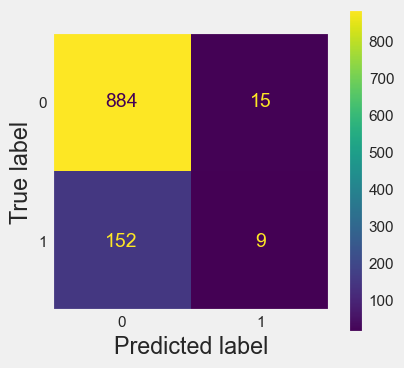

In [673]:
cm = confusion_matrix(y_test, preds_dt)
plt.rcParams['figure.figsize']= 4,4
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

# Confusion Matrix: | TN | FP |       #   Recall = TP/(TP+FN)
#                   | FN | TP |       #

In [715]:
tn4, fp4, fn4, tp4 = confusion_matrix(y_test, preds_dt).ravel()
print(tn4, fp4, fn4, tp4)

884 15 152 9


In [749]:
dt_importances = dt_grid_search.best_estimator_.feature_importances_
dt_importances = importances.reshape(1,-1)

dt_importances_df = pd.DataFrame(dt_importances, columns=X_i.columns)
plt.rcParams['figure.figsize']= 6,5
dt_importances_df.sum().sort_values(ascending=False).round(4).plot(kind='bar', backend = 'plotly')

**Decision Tree grid search best estimator finds that the leading predictors for a 10 Year Chance for Heart Disease are: age (by far), no. of cigarettes per day, systolic blood pressure level, and being male. Same as Logistic Regression model.**

**Decision Tree model, same as Random Forest, got poor results in terms of recall and accuracy. This is due to a lack of distinct correlations between a small number of fetures and the target.**

#  <font color= blue>SVM - Support Vector Machine</font>

In [450]:
svc = SVC()
svc.fit(X_train_scaled,y_train)

# score the model 
print("The accuracy of the SVC for train is {:.4%}".format(svc.score(X_train_scaled, y_train)))
print("The accuracy of the SVC for test is {:.4%}".format(svc.score(X_test_scaled, y_test)))

The accuracy of the SVC for train is 86.0289%
The accuracy of the SVC for test is 84.7170%


**Grid Search SVM**

In [677]:
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']
C_range = range(1, 10, 2)
degree_range = range(1, 5)
max_iter_range = [100, 1000]
#max_iter_range = [-1, 1, 2]

grid = dict(kernel = kernel_range,C=C_range, degree=degree_range, max_iter=max_iter_range)
#grid = dict(kernel = kernel_range,C=C_range,degree=degree_range)

In [678]:
grid_svm = GridSearchCV(estimator = SVC() 
                           ,param_grid = grid
                           ,n_jobs = -1
                           ,cv = 5
                           ,scoring ='recall')

SVMgrid_result = grid_svm.fit(X_train_scaled, y_train)

/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: Conv

**Grid Search Results**

In [679]:
best_SVM_params = grid_svm.best_params_
print('SVM grid search best params: ', best_SVM_params)

SVM grid search best params:  {'C': 1, 'degree': 4, 'kernel': 'poly', 'max_iter': 100}


In [680]:
preds_svm = grid_svm.best_estimator_.predict(X_test_scaled)

svm_mse = mean_squared_error(y_test, preds_svm)
print('mse for SVM grid = ', svm_mse)

mse for SVM grid =  0.8386792452830188


In [681]:
# summarize results
SVMgrid_result_df = pd.DataFrame(SVMgrid_result.cv_results_)

In [682]:
SVMgrid_result_df.sort_values(by = 'rank_test_score').head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
26       0.059144      0.016758         0.037501        0.023401       1   
10       0.070542      0.021998         0.022048        0.008328       1   
58       0.046946      0.006502         0.017532        0.004290       3   
42       0.062731      0.014801         0.020772        0.008863       3   
18       0.048239      0.011507         0.017816        0.002766       1   

   param_degree param_kernel param_max_iter  \
26            4         poly            100   
10            2         poly            100   
58            4         poly            100   
42            2         poly            100   
18            3         poly            100   

                                               params  split0_test_score  \
26  {'C': 1, 'degree': 4, 'kernel': 'poly', 'max_i...           0.989691   
10  {'C': 1, 'degree': 2, 'kernel': 'poly', 'max_i...           0.989691   
58  {'C': 3, 'degree': 4, 'kernel': 'poly', 'max_i...           0.948454   
42  {'C': 3, 'degree': 2, 'kernel': 'poly', 'max_i...           0.958763   
18  {'C': 1, 'degree': 3, 'kernel': 'poly', 'max_i...           0.948454   

    split1_test_score  split2_test_score  split3_test_score  \
26           0.886598           0.948454           0.968750   
10           0.886598           0.958763           0.968750   
58           0.876289           0.948454           0.947917   
42           0.927835           0.927835           0.947917   
18           0.917526           0.917526           0.947917   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
26           0.927083         0.944115        0.035500                1  
10           0.906250         0.942010        0.039034                2  
58           0.947917         0.933806        0.028760                3  
42           0.906250         0.933720        0.018180                4  
18           0.927083         0.931701        0.013905                5

In [683]:
print("The accuracy score of the SVM grid for Train is: ",
      grid_svm.best_estimator_.score(X_train_scaled, y_train))

The accuracy score of the SVM grid for Train is:  0.15890497168030207


In [684]:
print("The accuracy score of the SVM grid for Test is: ",
      grid_svm.best_estimator_.score(X_test_scaled, y_test))

The accuracy score of the SVM grid for Test is:  0.16132075471698112


In [685]:
# Recall Score
print('SVM grid Recall score is : ', recall_score(y_test, preds_svm))

SVM grid Recall score is :  0.9006211180124224


In [686]:
print(classification_report(y_test,preds_svm))

              precision    recall  f1-score   support

           0       0.62      0.03      0.06       899
           1       0.14      0.90      0.25       161

    accuracy                           0.16      1060
   macro avg       0.38      0.46      0.15      1060
weighted avg       0.55      0.16      0.08      1060



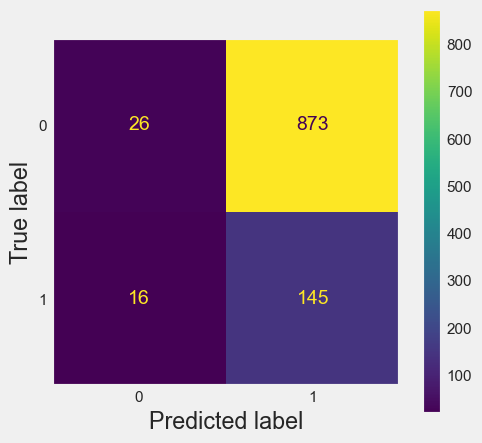

In [798]:
###.   With code to fix the white gridlines on the confusion matrix:   ####

cm = confusion_matrix(y_test, preds_svm)

plt.rcParams['figure.figsize']= 5,5
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

# Confusion Matrix: | TN | FP |
#                   | FN | TP |

In [717]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, preds_svm).ravel()
print(tn2, fp2, fn2, tp2)
fn2

26 873 16 145


16

**Features Importance**

In [688]:
# coef_ is only available when using a linear kernel. The best kernel used here is rbf.
svm_features_names = grid_svm.best_estimator_.feature_names_in_
print('SVM rbf kernel, features in names: \n', svm_features_names)

SVM rbf kernel, features in names: 
 ['male' 'age' 'education' 'currentSmoker' 'cigsPerDay' 'BPMeds'
 'prevalentStroke' 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP'
 'BMI' 'heartRate' 'glucose']


In [689]:
best_estimator_params = grid_svm.best_estimator_.get_params()
print('SVM best estimator params: \n', best_estimator_params)

SVM best estimator params: 
 {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 100, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


#  <font color= blue>KNN Classifier</font>
##  <font color= blue>GridSearchCV</font>

In [615]:
knn = KNeighborsClassifier()

In [619]:
k_range = np.array(range(1,15,1))
params = dict(n_neighbors=k_range, weights=['uniform', 'distance'], p=[1,2])
knn_grid = GridSearchCV(knn, param_grid = params, cv = 5, scoring ='recall')
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='recall')

In [620]:
best_knn_params = knn_grid.best_params_
print('KNN best params: ', best_knn_params)

KNN best params:  {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [621]:
preds_knn = knn_grid.best_estimator_.predict(X_test_scaled)

knn_grid_mse = mean_squared_error(y_test, preds_knn)
print('KNN GridSearch mse, for Test : ', knn_grid_mse)

KNN GridSearch mse, for Test :  0.22358490566037736


In [623]:
print("The accuracy score of KNN grid for Train is: ",
      knn_grid.best_estimator_.score(X_train_scaled, y_train))

The accuracy score of KNN grid for Train is:  1.0


In [625]:
print("The accuracy score of KNN grid for Test is: ",
      knn_grid.best_estimator_.score(X_test_scaled, y_test))

The accuracy score of KNN grid for Test is:  0.7764150943396226


In [626]:
# Recall Score
print('KNN grid Recall score is : ', recall_score(y_test, preds_knn))

KNN grid Recall score is :  0.19875776397515527


In [627]:
print(classification_report(y_test,preds_knn))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       899
           1       0.23      0.20      0.21       161

    accuracy                           0.78      1060
   macro avg       0.54      0.54      0.54      1060
weighted avg       0.76      0.78      0.77      1060



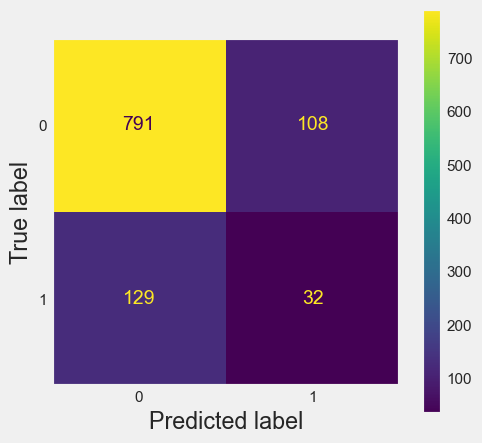

In [799]:
cm = confusion_matrix(y_test, preds_knn)

plt.rcParams['figure.figsize']= 5,5
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

# Confusion Matrix: | TN | FP |
#                   | FN | TP |

In [716]:
tn3, fp3, fn3, tp3= confusion_matrix(y_test, preds_knn).ravel()
print(tn3, fp3, fn3, tp3)

791 108 129 32


**KNN GridSearchCV Features Partial Dependence**

KNN does not return coefs like Logisric Regression or Desicion Trees do

In [632]:
knn_features_in = knn_grid.best_estimator_.feature_names_in_
#knn_features_in_df = pd.DataFrame(knn_features_in, columns=X_train_scaled.keys())
print('KNN Features in: \n', knn_features_in)


KNN Features in: 
 ['male' 'age' 'education' 'currentSmoker' 'cigsPerDay' 'BPMeds'
 'prevalentStroke' 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP'
 'BMI' 'heartRate' 'glucose']


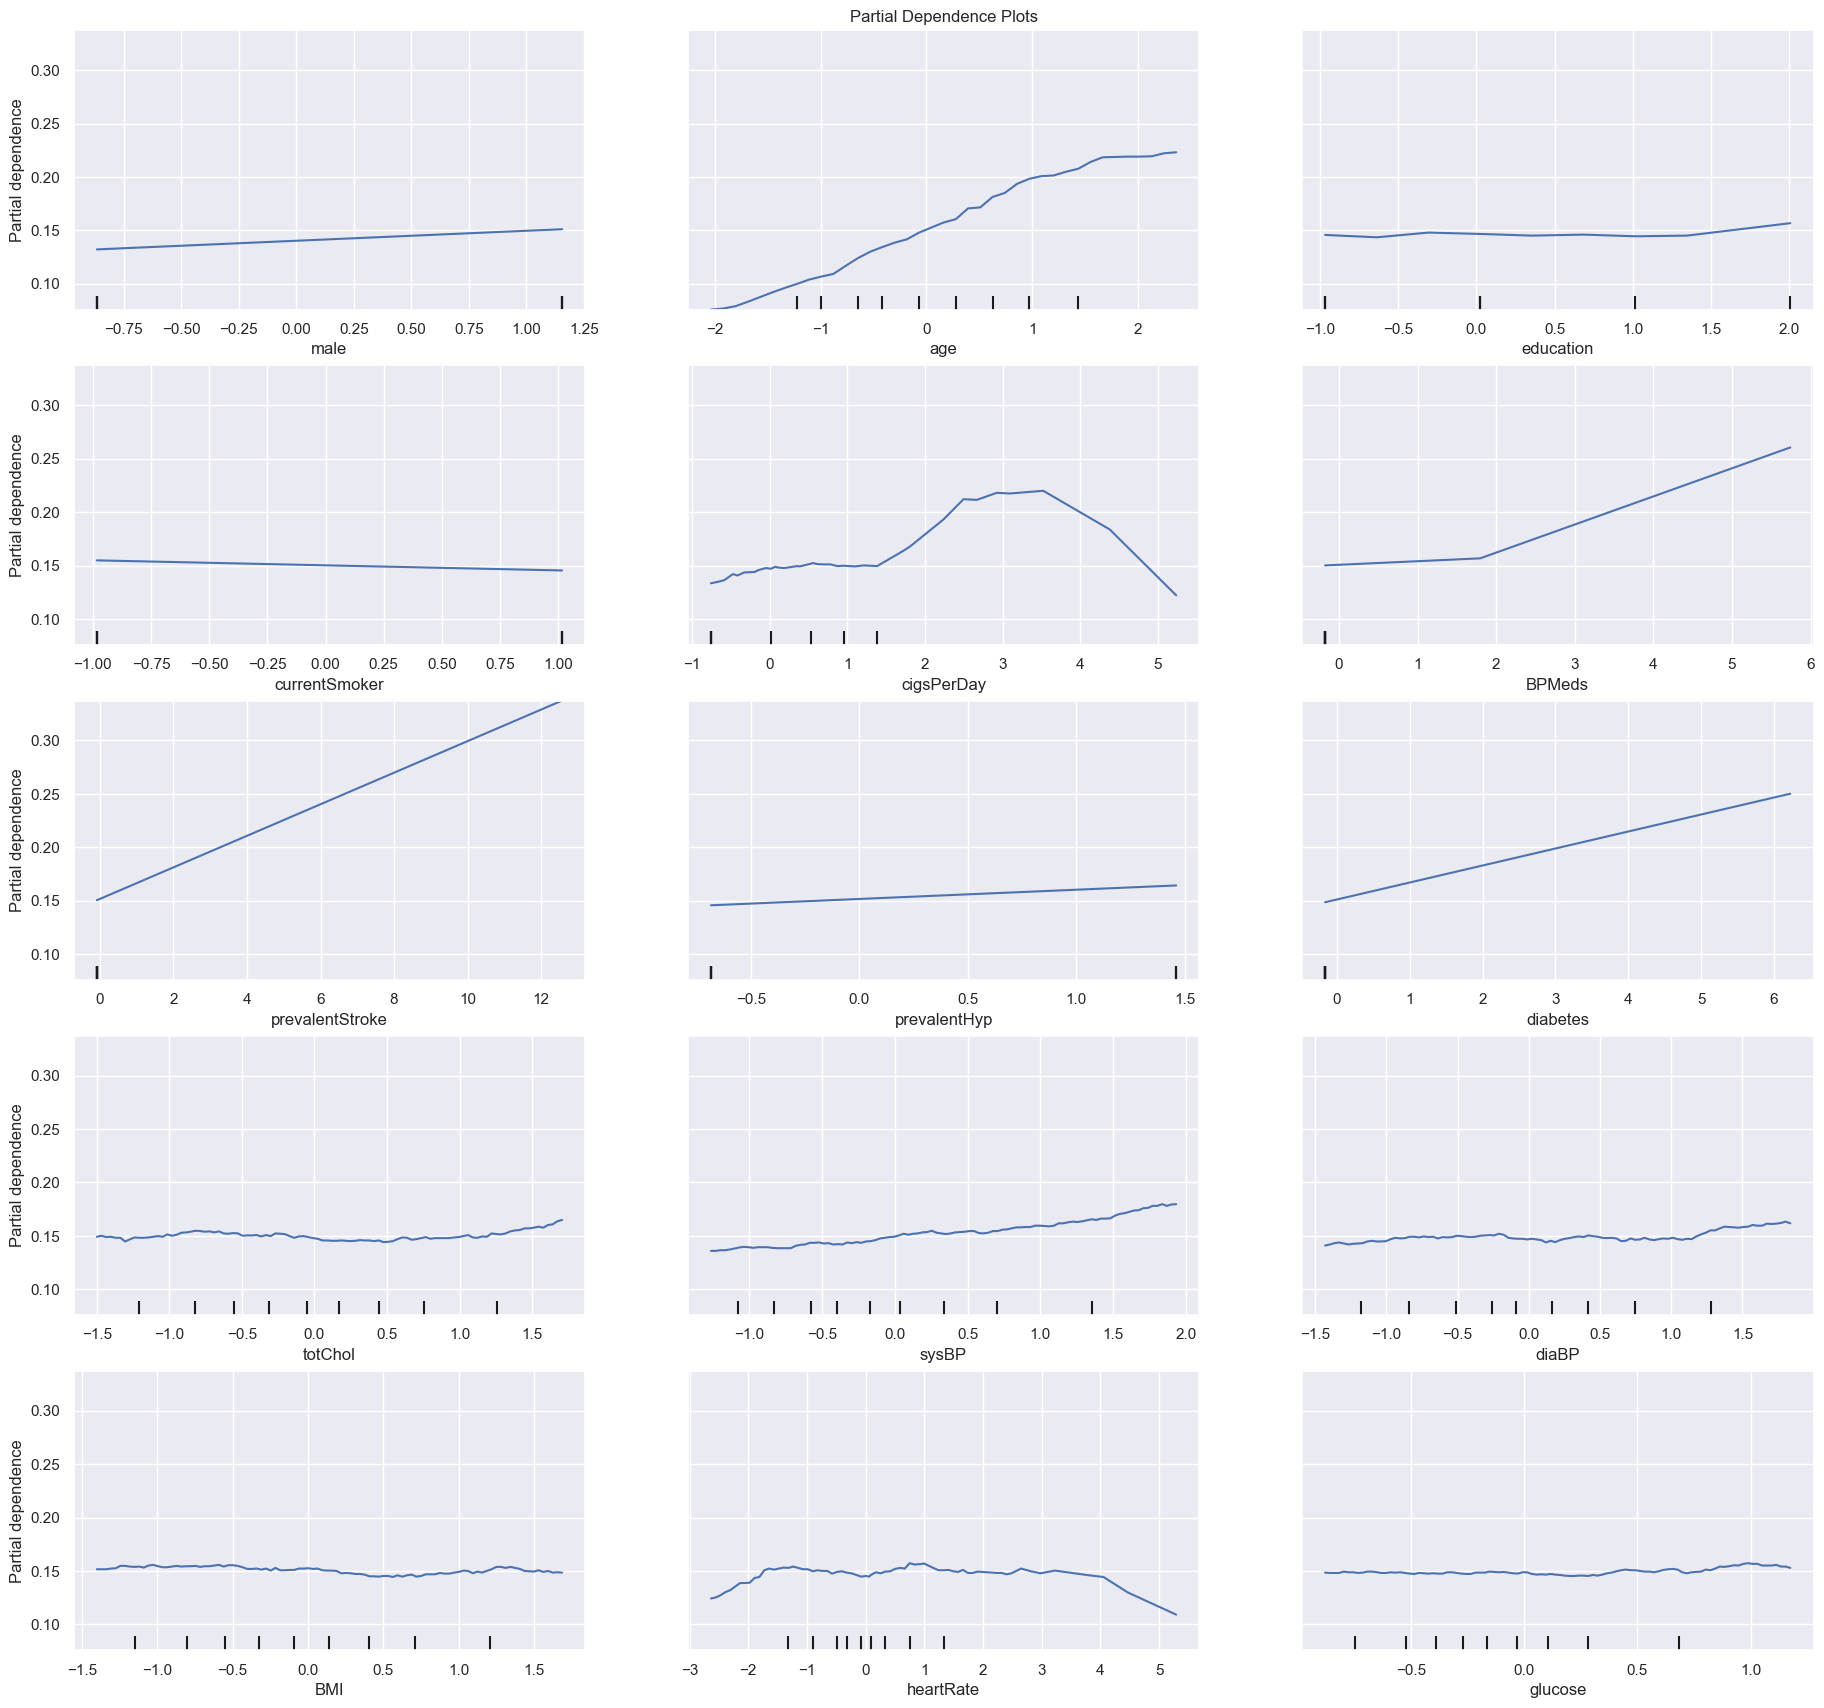

done


In [1024]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
fig, ax = plt.subplots(figsize = (20, 20))
PartialDependenceDisplay.from_estimator(knn_grid, X_train_scaled, features = X_train_scaled.keys(), ax = ax)
ax.set_title('Partial Dependence Plots')
plt.show()
print('done')

**From KNN partial dependencies plot I learn that the leading factors for predicting heart disease are: prevalent stroke, age, blood pressure meds, cigarettes per day, and systolic blod pressure. Some of these (age, cigarettes per day, sys blod pressure) go along with Logistic Regression and Decision Tree models features importances.**

# <font color= darkred> Modeling with male and female datasets
### <font color= darkblue> Now we know that gender is a major predictor for the  chance to get a heart disease within 10 years.</font>

# <font color= darkred> Woman Dataset</font>

In [808]:
wdf = df.query('male == 0')

In [811]:
wdf.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
1     0   46        2.0              0         0.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6             0         0    205.0  138.0   71.0  33.11       60.0     85.0   

   TenYearCHD  
1           0  
3           1  
4           0  
5           0  
6           1

In [833]:
wdf = wdf.drop(['male'], axis = 1)

In [834]:
wdf.shape

(2419, 15)

In [874]:
wdf.describe()

age    education  currentSmoker   cigsPerDay       BPMeds  \
count  2419.000000  2367.000000    2419.000000  2404.000000  2381.000000   
mean     49.800331     1.963667       0.408433     5.719634     0.037379   
std       8.596856     0.962280       0.491646     8.981764     0.189729   
min      32.000000     1.000000       0.000000     0.000000     0.000000   
25%      42.000000     1.000000       0.000000     0.000000     0.000000   
50%      49.000000     2.000000       0.000000     0.000000     0.000000   
75%      57.000000     3.000000       1.000000    10.000000     0.000000   
max      70.000000     4.000000       1.000000    50.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol        sysBP  \
count      2419.000000   2419.000000  2419.000000  2376.000000  2419.000000   
mean          0.006201      0.308392     0.023563   239.459596   133.040099   
std           0.078518      0.461925     0.151716    46.197982    23.794610   
min           0.000000      0.000000     0.000000   107.000000    83.500000   
25%           0.000000      0.000000     0.000000   206.000000   116.000000   
50%           0.000000      0.000000     0.000000   237.000000   128.000000   
75%           0.000000      1.000000     0.000000   268.000000   145.000000   
max           1.000000      1.000000     1.000000   600.000000   295.000000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  2419.000000  2405.000000  2419.000000  2146.000000  2419.000000  
mean     82.295163    25.512636    77.094667    81.836906     0.124432  
std      12.200553     4.495204    12.093332    23.244228     0.330142  
min      50.000000    15.960000    46.000000    40.000000     0.000000  
25%      74.000000    22.540000    69.000000    72.000000     0.000000  
50%      81.000000    24.750000    75.000000    78.000000     0.000000  
75%      89.000000    27.710000    85.000000    86.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [875]:
wdf.isna().sum()

age                  0
education           52
currentSmoker        0
cigsPerDay          15
BPMeds              38
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             43
sysBP                0
diaBP                0
BMI                 14
heartRate            0
glucose            273
TenYearCHD           0
dtype: int64

In [832]:
corr_matrix_w = wdf.corr()
corr_matrix_w['TenYearCHD'].sort_values(ascending=False)
# Correlations are the same as in the general dataset (for both men and women)

TenYearCHD         1.000000
age                0.232138
sysBP              0.217529
prevalentHyp       0.203864
diaBP              0.144223
glucose            0.122018
BPMeds             0.115324
totChol            0.101169
BMI                0.097453
diabetes           0.090060
prevalentStroke    0.065947
heartRate          0.012793
cigsPerDay        -0.001947
currentSmoker     -0.035514
education         -0.080977
male                    NaN
Name: TenYearCHD, dtype: float64

In [836]:
wdf['prevalentHyp'].value_counts(normalize= True)
# The percentage is the same as in the general study population

0    0.691608
1    0.308392
Name: prevalentHyp, dtype: float64

Text(0.5, 1.0, 'Women data, Total Colesterol by 10 Year Chance for Heart Disease (HD)')

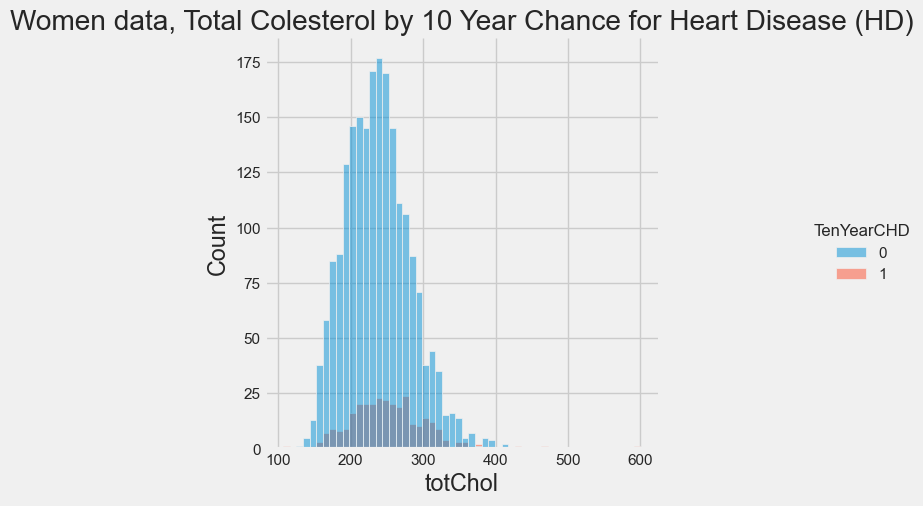

In [871]:
plt.rcParams['figure.figsize']=5,7
sns.displot(data=wdf, x='totChol', hue='TenYearCHD')
plt.title("Women data, Total Colesterol by 10 Year Chance for Heart Disease (HD)")

**Similarly to the general population data, the majority of participants has total cholesterol level higher than 200 which is consodered high risk for heart diesease.**

Text(0.5, 1.0, 'Women data, Sys Blood Pressure by 10 Year Chance for Heart Disease (HD)')

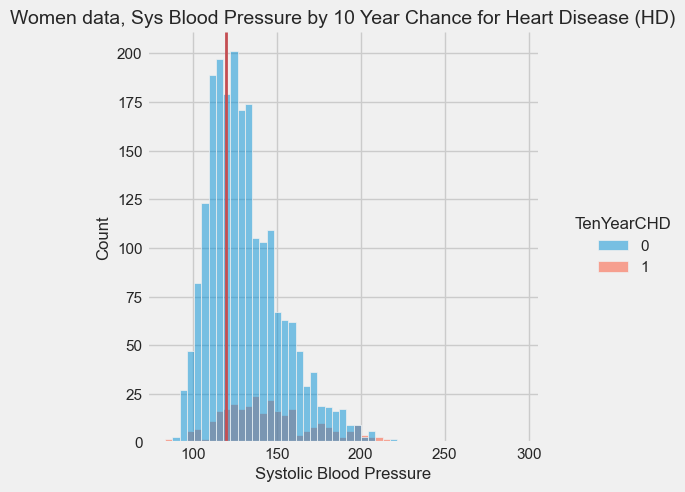

In [867]:
#plt.rcParams['figure.figsize']=3,4
sns.displot(data=wdf, x='sysBP', hue='TenYearCHD')
plt.xlabel('Systolic Blood Pressure', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.axvline(120, linewidth=2, color='r')
plt.title("Women data, Sys Blood Pressure by 10 Year Chance for Heart Disease (HD)",
         fontsize = 14)

**Systolic blood pressure: As we can see, more than half of the women in the study have an elevated level of blood pressure: sys. BP > 120 (red line located at sysBP = 120)**

### Preparing women data for modeling - KNNImputer and Scaling

In [886]:
Xw = wdf.drop(['TenYearCHD'], axis = 1)
yw = wdf['TenYearCHD']

In [887]:
Xw.shape

(2419, 14)

In [935]:
yw.value_counts(normalize=True)
# I can expect a baselinr of 87% accuracy looking at the target distribution of values.

0    0.875568
1    0.124432
Name: TenYearCHD, dtype: float64

In [888]:
imputer = KNNImputer(n_neighbors = 3)
Xw_i = imputer.fit_transform(Xw)
Xw_i = pd.DataFrame(Xw_i, columns = Xw.columns)

In [892]:
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw_i, yw, test_size=0.25,
                                                        random_state = 34, stratify=yw)

In [901]:
yw_train.value_counts(normalize=True)

0    0.875413
1    0.124587
Name: TenYearCHD, dtype: float64

In [893]:
scaler = StandardScaler()

Xw_train_scaled = scaler.fit_transform(Xw_train)
Xw_test_scaled = scaler.fit_transform(Xw_test)

Xw_train_scaled = pd.DataFrame(Xw_train_scaled, columns=Xw_i.columns)

Xw_test_scaled = pd.DataFrame(Xw_test_scaled, columns=Xw_i.columns)

## <font color= darkblue> Model Building - Women Dataset </font> 

## <font color= darkred> Logistic Regression </font> 

In [894]:
params = {'C' : [0.01, 0.5, 0.1, 1, 10],
         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         }

wlgr_grid = GridSearchCV(estimator = LogisticRegression(random_state = 42,verbose = 1), 
                       param_grid = params, scoring = 'recall',
                        cv = 5)

wlgr_grid.fit(Xw_train_scaled, yw_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

Epoch 1, change: 1.00000000
Epoch 2, change: 0.27660036
Epoch 3, change: 0.42338382
Epoch 4, change: 0.28748587
Epoch 5, change: 0.13506698
Epoch 6, change: 0.08252726
Epoch 7, change: 0.07943349
Epoch 8, change: 0.05851130
Epoch 9, change: 0.03360292
Epoch 10, change: 0.04174640
Epoch 11, change: 0.02867695
Epoch 12, change: 0.01895205
Epoch 13, change: 0.00992780
Epoch 14, change: 0.00976079
Epoch 15, change: 0.00973537
Epoch 16, change: 0.00734423
Epoch 17, change: 0.00478373
Epoch 18, change: 0.00245627
Epoch 19, change: 0.00184990
Epoch 20, change: 0.00183636
Epoch 21, change: 0.00107544
Epoch 22, change: 0.00088022
Epoch 23, change: 0.00131260
Epoch 24, change: 0.00105209
Epoch 25, change: 0.00021173
Epoch 26, change: 0.00055531
Epoch 27, change: 0.00065551
Epoch 28, change: 0.00032810
Epoch 29, change: 0.00014376
Epoch 30, change: 0.00011911
Epoch 1, change: 1.00000000
Epoch 2, change: 0.57171071
Epoch 3, change: 0.52360379
Epoch 4, change: 0.31624732
Epoch 5, change: 0.12834031

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 21 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
31
Epoch 10, change: 0.05521379
Epoch 11, change: 0.02821065
Epoch 12, change: 0.02086779
Epoch 13, change: 0.01491302
Epoch 14, change: 0.00731108
Epoch 15, change: 0.00628395
Epoch 16, change: 0.00585364
Epoch 17, change: 0.00565696
Epoch 18, change: 0.00440146
Epoch 19, change: 0.00226190
Epoch 20, change: 0.00114443
Epoch 21, change: 0.00087427
Epoch 22, change: 0.00128352
Epoch 23, change: 0.00094475
Epoch 24, change: 0.00095935
Epoch 25, change: 0.00044916
Epoch 26, change: 0.00015289
Epoch 27, change: 0.00026031
Epoch 1, change: 1.00000000
Epoch 2, change: 0.27471672
Epoch 3, change: 1.01198495
Epoch 4, change: 0.22314998
Epoch 5, change: 0.19219430
Epoch 6, change: 0.08614263
Epoch 7, change: 0.06403382
Epoch 8, change: 0.05551138
Epoch 9, change: 0.03810511
Epoch 10, change: 0.03047505
Epoch 11, change: 0.01771581
Epoch 12, change: 0.01344237
Epoch 13, change: 0.01356782
Epoch 14, change: 0.0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]convergence after 25 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 32 epochs took 0 seconds
convergence after 25 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

convergence after 36 epochs took 0 seconds
convergence after 36 epochs took 0 seconds
convergence after 35 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]convergence after 25 epochs took 0 seconds
00603352
Epoch 18, change: 0.00589935
Epoch 19, change: 0.00313237
Epoch 20, change: 0.00208970
Epoch 21, change: 0.00253003
Epoch 22, change: 0.00174176
Epoch 23, change: 0.00082513
Epoch 24, change: 0.00024482
Epoch 25, change: 0.00082367
Epoch 26, change: 0.00092283
Epoch 27, change: 0.00097254
Epoch 28, change: 0.00062299
Epoch 29, change: 0.00040324
Epoch 30, change: 0.00033700
Epoch 31, change: 0.00019311
Epoch 32, change: 0.00012039
Epoch 33, change: 0.00010550
Epoch 34, change: 0.00010883
Epoch 1, change: 1.00000000
Epoch 2, change: 0.35842760
Epoch 3, change: 0.78662149
Epoch 4, change: 0.32257395
Epoch 5, change: 0.18494873
Epoch 6, change: 0.24314308
Epoch 7, change: 0.20246520
Epoch 8, change: 0.11058318
Epoch 9, change: 0.06191548
Epoch 10, change: 0.05757675
Epoch 11, change: 0.02631619
Epoch 12, change: 0.01223490
Epoch 13, change: 0.00969672
Epoch 14, change: 0.00680141
Epo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

convergence after 22 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 31 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


re 3.428e+00 delta 1.260e+00 f 1.006e+01 |g| 5.891e+00 CG   2
iter  2 act 6.129e-02 pre 5.922e-02 delta 1.260e+00 f 6.449e+00 |g| 7.169e-01 CG   2
iter  3 act 1.032e-03 pre 1.031e-03 delta 1.260e+00 f 6.387e+00 |g| 7.604e-02 CG   3
iter  4 act 9.353e-06 pre 9.354e-06 delta 1.260e+00 f 6.386e+00 |g| 6.384e-03 CG   4
iter  5 act 4.924e-09 pre 4.924e-09 delta 1.260e+00 f 6.386e+00 |g| 1.628e-04 CG   3
iter  1 act 3.591e+00 pre 3.414e+00 delta 1.265e+00 f 1.006e+01 |g| 5.835e+00 CG   2
iter  2 act 5.971e-02 pre 5.776e-02 delta 1.265e+00 f 6.467e+00 |g| 6.936e-01 CG   3
iter  3 act 3.888e-04 pre 3.882e-04 delta 1.265e+00 f 6.407e+00 |g| 5.385e-02 CG   4
iter  4 act 1.610e-07 pre 1.610e-07 delta 1.265e+00 f 6.407e+00 |g| 9.846e-04 CG   3
iter  5 act 1.599e-09 pre 1.599e-09 delta 1.265e+00 f 6.407e+00 |g| 9.237e-05 CG   4
iter  1 act 3.637e+00 pre 3.452e+00 delta 1.272e+00 f 1.006e+01 |g| 5.883e+00 CG   2
iter  2 act 5.908e-02 pre 5.711e-02 delta 1.272e+00 f 6.421e+00 |g| 7.065e-01 CG   2
ite

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialB

[LibLinear][LibLinear][LibLinear]        F
   15     20     22      1     0     0   5.207D-03   4.906D+02
  F =   490.64694047940202     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00576D+03    |proj g|=  5.45500D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     19     21      1     0     0   3.229D-03   4.848D+02
  F =   484.82910123225020     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH        

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

convergence after 36 epochs took 0 seconds
convergence after 37 epochs took 0 seconds
convergence after 36 epochs took 0 seconds
nge: 0.00037711
Epoch 1, change: 1.00000000
Epoch 2, change: 0.25358608
Epoch 3, change: 0.30036791
Epoch 4, change: 0.16861123
Epoch 5, change: 0.18119131
Epoch 6, change: 0.20765709
Epoch 7, change: 0.11951828
Epoch 8, change: 0.07121476
Epoch 9, change: 0.02860780
Epoch 10, change: 0.05851350
Epoch 11, change: 0.03192668
Epoch 12, change: 0.02609381
Epoch 13, change: 0.02179572
Epoch 14, change: 0.01189017
Epoch 15, change: 0.00939167
Epoch 16, change: 0.00488888
Epoch 17, change: 0.00191106
Epoch 18, change: 0.00137854
Epoch 19, change: 0.00219973
Epoch 20, change: 0.00120941
Epoch 21, change: 0.00070170
Epoch 22, change: 0.00037350
Epoch 23, change: 0.00043616
Epoch 24, change: 0.00013194
Epoch 25, change: 0.00020591
Epoch 26, change: 0.00014515
Epoch 1, change: 1.00000000
Epoch 2, change: 0.37079867
Epoch 3, change: 0.33807156
Epoch 4, change: 0.2029432

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[LibLinear] the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     15     16      1     0     0   4.580D-03   4.907D+02
  F =   490.73222389706478     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00576D+03    |proj g|=  5.44500D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     20     22      1     0     0   6.218D

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 27 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 33 epochs took 0 seconds
convergence after 26 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


convergence after 37 epochs took 0 seconds
convergence after 37 epochs took 0 seconds
convergence after 37 epochs took 0 seconds
[LibLinear]Epoch 1, change: 1.00000000
Epoch 2, change: 0.42245746
Epoch 3, change: 0.23201685
Epoch 4, change: 0.16438697
Epoch 5, change: 0.17700553
Epoch 6, change: 0.18062928
Epoch 7, change: 0.13625737
Epoch 8, change: 0.07178274
Epoch 9, change: 0.06333390
Epoch 10, change: 0.05569101
Epoch 11, change: 0.03888164
Epoch 12, change: 0.03230101
Epoch 13, change: 0.02310215
Epoch 14, change: 0.01971305
Epoch 15, change: 0.00976581
Epoch 16, change: 0.00929300
Epoch 17, change: 0.00392005
Epoch 18, change: 0.00212420
Epoch 19, change: 0.00219936
Epoch 20, change: 0.00124297
Epoch 21, change: 0.00059824
Epoch 22, change: 0.00057750
Epoch 23, change: 0.00059666
Epoch 24, change: 0.00041026
Epoch 1, change: 1.00000000
Epoch 2, change: 0.26094068
Epoch 3, change: 0.30623503
Epoch 4, change: 0.17076656
Epoch 5, change: 0.19215563
Epoch 6, change: 0.22671111
Epoch

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42, verbose=1),
             param_grid={'C': [0.01, 0.5, 0.1, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall')

In [896]:
best_wlgr_params = wlgr_grid.best_params_
print('W Logistic Regression GridSearchCV best params: ', best_wlgr_params)

W Logistic Regression GridSearchCV best params:  {'C': 0.01, 'solver': 'liblinear'}


In [1041]:
predsw = wlgr_grid.best_estimator_.predict(Xw_test_scaled)
wlgr_mse = mean_squared_error(yw_test, predsw)
print("mse for LogisticRegression grid = {:.4f}".format(wlgr_mse))

mse for LogisticRegression grid = 0.1256


In [1042]:
print("The accuracy score of W LGR grid for Train is {:.4f}"
      .format(wlgr_grid.best_estimator_.score(Xw_train_scaled, yw_train)))

The accuracy score of W LGR grid for Train is 0.8787


In [1043]:
print("The accuracy score of W LGR grid for Test is {:.4f}"
      .format(wlgr_grid.best_estimator_.score(Xw_test_scaled, yw_test)))

The accuracy score of W LGR grid for Test is 0.8744


In [1044]:
print("W LGR Recall Score is: {:.4f}".format(recall_score(yw_test, predsw)))

W LGR Recall Score is: 0.0133


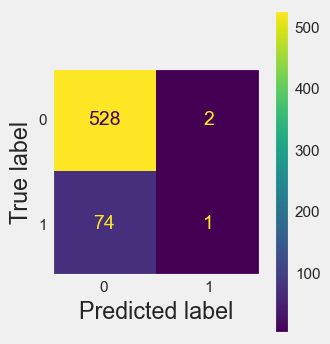

In [902]:
cm = confusion_matrix(yw_test, predsw)

disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.rcParams['figure.figsize']= 4,4
plt.grid(False)
plt.show()

# Confusion Matrix: | TN | FP |
#                   | FN | TP |

In [1032]:
tnw, fpw, fnw, tpw = confusion_matrix(yw_test, predsw).ravel()
print(tnw, fpw, fnw, tpw)

528 2 74 1


In [903]:
wcoefs = wlgr_grid.best_estimator_.coef_
wcoefs_df = pd.DataFrame(wcoefs, columns=Xw_train_scaled.keys())
print('Logistic Regression Grid Search Coefs: \n', wcoefs_df)

Logistic Regression Grid Search Coefs: 
         age  education  currentSmoker  cigsPerDay    BPMeds  prevalentStroke  \
0  0.230507  -0.040203       0.001275    0.102091  0.052968         0.074157   

   prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  heartRate  \
0      0.096185  0.039331  0.034087  0.154492 -0.010861 -0.002144  -0.002869   

    glucose  
0  0.088987  


In [904]:
plt.rcParams['figure.figsize']= 6,4
wcoefs_df.sum().sort_values(ascending=False).round(4).plot(kind='bar',backend='plotly')

### <font color= darkred> SVM </font> 

In [906]:
wsvc = SVC()
wsvc.fit(Xw_train_scaled,yw_train)

# score the model 
print("The accuracy of the W SVC (default) for train is {:.4%}".
      format(wsvc.score(Xw_train_scaled, yw_train)))
print("The accuracy of the W SVC (default) for test is {:.4%}".
      format(wsvc.score(Xw_test_scaled, yw_test)))

The accuracy of the W SVC (default) for train is 88.6439%
The accuracy of the W SVC (default) for test is 87.4380%


In [907]:
grid = dict(kernel = kernel_range,C=C_range, degree=degree_range, max_iter=max_iter_range)

wgrid_svm = GridSearchCV(estimator = SVC() 
                           ,param_grid = grid
                           ,n_jobs = -1
                           ,cv = 5
                           ,scoring ='recall')

wgrid_svm.fit(Xw_train_scaled, yw_train)

/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: Conv

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(1, 10, 2), 'degree': range(1, 5),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [100, 1000]},
             scoring='recall')

In [908]:
best_wSVM_params = wgrid_svm.best_params_
print('SVM grid search best params: ', best_wSVM_params)

SVM grid search best params:  {'C': 1, 'degree': 4, 'kernel': 'poly', 'max_iter': 100}


In [1045]:
predsw_svm = wgrid_svm.best_estimator_.predict(Xw_test_scaled)

wsvm_mse = mean_squared_error(yw_test, predsw_svm)
print('mse for W SVM grid = {:.4f}'.format(wsvm_mse))

print("The accuracy score of the W SVM grid for Train is: {:.4f}".format
      (wgrid_svm.best_estimator_.score(Xw_train_scaled, yw_train)))

print("The accuracy score of the W SVM grid for Test is: {:.4f}".format
      (wgrid_svm.best_estimator_.score(Xw_test_scaled, yw_test)))

print('W SVM grid Recall score is : {:.4f}'.format(recall_score(yw_test, predsw_svm)))

mse for W SVM grid = 0.8694
The accuracy score of the W SVM grid for Train is: 0.1257
The accuracy score of the W SVM grid for Test is: 0.1306
W SVM grid Recall score is : 0.9333


In [910]:
print(classification_report(yw_test,predsw_svm))

              precision    recall  f1-score   support

           0       0.64      0.02      0.03       530
           1       0.12      0.93      0.21        75

    accuracy                           0.13       605
   macro avg       0.38      0.48      0.12       605
weighted avg       0.58      0.13      0.06       605



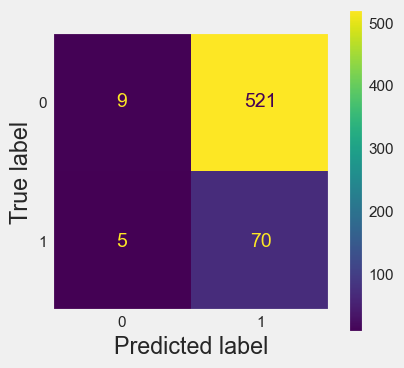

In [911]:
cm = confusion_matrix(yw_test, predsw_svm)

plt.rcParams['figure.figsize']= 4,4
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

# Confusion Matrix: | TN | FP |
#                   | FN | TP |

In [1033]:
tnw2, fpw2, fnw2, tpw2 = confusion_matrix(yw_test, predsw_svm).ravel()
print(tnw2, fpw2, fnw2, tpw2)

9 521 5 70


# <font color= green> Man Dataset</font>

In [913]:
mdf = df.query('male == 1')

In [915]:
mdf = mdf.drop(['male'], axis = 1)

In [916]:
mdf.describe()

age    education  currentSmoker   cigsPerDay       BPMeds  \
count  1819.000000  1766.000000    1819.000000  1805.000000  1804.000000   
mean     49.298516     1.999434       0.608026    13.376177     0.019401   
std       8.533146     1.092078       0.488325    13.801282     0.137969   
min      33.000000     1.000000       0.000000     0.000000     0.000000   
25%      42.000000     1.000000       0.000000     0.000000     0.000000   
50%      48.000000     2.000000       1.000000    15.000000     0.000000   
75%      56.000000     3.000000       1.000000    20.000000     0.000000   
max      69.000000     4.000000       1.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol        sysBP  \
count      1819.000000   1819.000000  1819.000000  1812.000000  1819.000000   
mean          0.005498      0.313359     0.028587   233.131347   131.437878   
std           0.073962      0.463987     0.166689    42.133748    19.426875   
min           0.000000      0.000000     0.000000   113.000000    83.500000   
25%           0.000000      0.000000     0.000000   206.000000   118.000000   
50%           0.000000      0.000000     0.000000   230.500000   128.000000   
75%           0.000000      1.000000     0.000000   258.000000   141.000000   
max           1.000000      1.000000     1.000000   696.000000   235.000000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  1819.000000  1814.000000  1818.000000  1704.000000  1819.000000  
mean     83.689115    26.185656    74.261276    82.130282     0.188565  
std      11.469358     3.417345    11.746939    24.838020     0.391270  
min      48.000000    15.540000    44.000000    40.000000     0.000000  
25%      76.000000    23.960000    66.000000    70.000000     0.000000  
50%      82.000000    26.085000    75.000000    78.000000     0.000000  
75%      90.000000    28.347500    80.000000    87.000000     0.000000  
max     136.000000    40.380000   125.000000   394.000000     1.000000

In [918]:
print("Men dataset, mean age =  {:.2f}".format(mdf['age'].mean()))
print("Women dataset, mean age =  {:.2f}".format(wdf['age'].mean()))

Men dataset, mean age =  49.30
Women dataset, mean age =  49.80


In [919]:
print("Men median BMI =  {:.2f}".format(mdf['BMI'].mean()))
print("Women median BMI =  {:.2f}".format(wdf['BMI'].mean()))

Men median BMI =  26.19
Women median BMI =  25.51


In [920]:
print("Men median total cholesterol =  {:.2f}".format(mdf['totChol'].mean()))
print("Women median total cholesterol =  {:.2f}".format(wdf['totChol'].mean()))

Men median total cholesterol =  233.13
Women median total cholesterol =  239.46


In [921]:
print("Men median systolic blood pressure =  {:.2f}".format(mdf['sysBP'].mean()))
print("Women median systolic blood pressure =  {:.2f}".format(wdf['sysBP'].mean()))

Men median systolic blood pressure =  131.44
Women median systolic blood pressure =  133.04


**Looking at the above mean age, median cholesterol,BP levels and BPI, those measures go around the same values for both men and women in the study**

### Preparing men data for modeling - KNNImputer and Scaling

In [922]:
Xm = mdf.drop(['TenYearCHD'], axis = 1)
ym = mdf['TenYearCHD']

In [936]:
ym.value_counts(normalize=True)

0    0.811435
1    0.188565
Name: TenYearCHD, dtype: float64

In [923]:
Xm_i = imputer.fit_transform(Xm)
Xm_i = pd.DataFrame(Xm_i, columns = Xm.columns)

In [925]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm_i, ym, test_size=0.25,
                                                    random_state = 34, stratify=ym)

In [937]:
ym_train.value_counts(normalize=True)

0    0.811584
1    0.188416
Name: TenYearCHD, dtype: float64

In [926]:
Xm_train_scaled = scaler.fit_transform(Xm_train)
Xm_test_scaled = scaler.fit_transform(Xm_test)

Xm_train_scaled = pd.DataFrame(Xm_train_scaled, columns=Xm_i.columns)

Xm_test_scaled = pd.DataFrame(Xm_test_scaled, columns=Xm_i.columns)

In [928]:
#Xm_train_scaled.plot(kind = 'kde', subplots = True, figsize=(8,16));

## <font color= darkblue> Model Building - Men Dataset </font> 

## <font color= green> Logistic Regression Grid </font> 

In [929]:
params = {'C' : [0.01, 0.5, 0.1, 1, 10],
         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         }

mlgr_grid = GridSearchCV(estimator = LogisticRegression(random_state = 42,verbose = 1), 
                       param_grid = params, scoring = 'recall',
                        cv = 5)

mlgr_grid.fit(Xm_train_scaled, ym_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56224D+02    |proj g|=  3.39500D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     10     11      1     0     0   8.683D-04   4.860D+02
  F =   485.97288943119281     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.5

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


convergence after 19 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 18 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 15 epochs took 1 seconds
convergence after 15 epochs took 0 seconds
convergence after 17 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


convergence after 17 epochs took 0 seconds
convergence after 15 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]convergence after 29 epochs took 0 seconds
convergence after 35 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 34 epochs took 0 seconds
convergence after 36 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 21 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 22 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

  Skip  Nact     Projg        F
   15      9     10      1     0     0   5.822D-03   4.854D+02
  F =   485.40065950854023     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56917D+02    |proj g|=  3.40000D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     10     11      1     0     0   3.916D-04   4.835D+02
  F =   483.53412601149387     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
iter 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]convergence after 23 epochs took 0 seconds
convergence after 32 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 30 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 36 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
convergence after 21 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


convergence after 19 epochs took 0 seconds
convergence after 20 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]convergence after 29 epochs took 0 seconds
convergence after 35 epochs took 0 seconds
convergence after 28 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


convergence after 34 epochs took 0 seconds
convergence after 36 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
convergence after 25 epochs took 1 seconds
convergence after 21 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


convergence after 21 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
.421e+00 f 2.366e+02 |g| 5.820e-02 CG   4
iter  6 act 3.691e-07 pre 3.691e-07 delta 1.421e+00 f 2.366e+02 |g| 5.714e-03 CG   5
iter  1 act 1.319e+02 pre 1.214e+02 delta 1.422e+00 f 3.781e+02 |g| 1.931e+02 CG   2
iter  2 act 7.406e+00 pre 6.673e+00 delta 1.422e+00 f 2.463e+02 |g| 3.458e+01 CG   3
iter  3 act 3.420e-01 pre 3.331e-01 delta 1.422e+00 f 2.388e+02 |g| 6.116e+00 CG   5
iter  4 act 2.518e-03 pre 2.514e-03 delta 1.422e+00 f 2.385e+02 |g| 5.262e-01 CG   5
iter  5 act 1.663e-05 pre 1.663e-05 delta 1.422e+00 f 2.385e+02 |g| 4.411e-02 CG   5
iter  6 act 1.730e-07 pre 1.730e-07 delta 1.422e+00 f 2.385e+02 |g| 3.935e-03 CG   6
iter  1 act 1.323e+02 pre 1.219e+02 delta 1.417e+00 f 3.781e+02 |g| 1.947e+02 CG   2
iter  2 act 7.037e+00 pre 6.363e+00 delta 1.417e+00 f 2.458e+02 |g| 3.487e+01 CG   3
iter  3 act 2.512e-01 pre 2.447e-01 delta 1.417e+00 f 2.388e+02 |g| 5.649e+00 CG   4
iter  4 act 2.010e-03 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


unds

At iterate    0    f=  7.56224D+02    |proj g|=  3.40500D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     13     15      1     0     0   6.793D-03   4.697D+02
  F =   469.71262792637646     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56917D+02    |proj g|=  3.40000D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segm

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers

Epoch 1, change: 1.00000000
Epoch 2, change: 0.32612428
Epoch 3, change: 0.34457760
Epoch 4, change: 0.24574107
Epoch 5, change: 0.20717326
Epoch 6, change: 0.15979834
Epoch 7, change: 0.10915596
Epoch 8, change: 0.07580406
Epoch 9, change: 0.04385472
Epoch 10, change: 0.01883284
Epoch 11, change: 0.02588237
Epoch 12, change: 0.01965244
Epoch 13, change: 0.01632664
Epoch 14, change: 0.01548250
Epoch 15, change: 0.00788401
Epoch 16, change: 0.00526816
Epoch 17, change: 0.00646894
Epoch 18, change: 0.00688019
Epoch 19, change: 0.00415059
Epoch 20, change: 0.00090053
Epoch 21, change: 0.00053166
Epoch 22, change: 0.00040036
Epoch 23, change: 0.00015798
Epoch 24, change: 0.00021151
Epoch 25, change: 0.00021788
Epoch 26, change: 0.00024507
Epoch 27, change: 0.00011579
Epoch 28, change: 0.00015717
Epoch 1, change: 1.00000000
Epoch 2, change: 0.28717546
Epoch 3, change: 0.37947219
Epoch 4, change: 0.45226969
Epoch 5, change: 0.40498285
Epoch 6, change: 0.21140226
Epoch 7, change: 0.38589229
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


iter  1 act 2.734e+03 pre 2.503e+03 delta 1.441e+00 f 7.569e+03 |g| 3.975e+03 CG   2
iter  2 act 1.900e+02 pre 1.691e+02 delta 1.441e+00 f 4.835e+03 |g| 7.724e+02 CG   3
iter  3 act 1.013e+01 pre 9.775e+00 delta 1.441e+00 f 4.645e+03 |g| 1.430e+02 CG   5
iter  4 act 7.127e-02 pre 7.107e-02 delta 1.441e+00 f 4.635e+03 |g| 1.221e+01 CG   5
iter  5 act 3.635e-04 pre 3.635e-04 delta 1.441e+00 f 4.635e+03 |g| 9.580e-01 CG   5
convergence after 29 epochs took 0 seconds
convergence after 35 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 36 epochs took 0 seconds
convergence after 36 epochs took 0 seconds
convergence after 22 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

convergence after 25 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 21 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
[LibLinear]Epoch 1, change: 1.00000000
Epoch 2, change: 0.32906939
Epoch 3, change: 0.34229983
Epoch 4, change: 0.25020734
Epoch 5, change: 0.21161576
Epoch 6, change: 0.16391406
Epoch 7, change: 0.11216719
Epoch 8, change: 0.07616122
Epoch 9, change: 0.04768195
Epoch 10, change: 0.02102396
Epoch 11, change: 0.02643321
Epoch 12, change: 0.02081324
Epoch 13, change: 0.01677660
Epoch 14, change: 0.01585687
Epoch 15, change: 0.00844339
Epoch 16, change: 0.00568190
Epoch 17, change: 0.00658374
Epoch 18, change: 0.00715285
Epoch 19, change: 0.00427557
Epoch 20, change: 0.00090706
Epoch 21, change: 0.00056588
Epoch 22, change: 0.00043811
Epoch 23, change: 0.00015976
Epoch 24, change: 0.00022668
Epoch 25, change: 0.00023114
Epoch 26, change: 0.00026642
Epoch 27, change: 0.00012267
Epoch 28, change: 0.00017316
Epoch 1, chang

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42, verbose=1),
             param_grid={'C': [0.01, 0.5, 0.1, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall')

poch 8, change: 0.15147359
Epoch 9, change: 0.34475438
Epoch 10, change: 0.04099695
Epoch 11, change: 0.18941796
Epoch 12, change: 0.08948839
Epoch 13, change: 0.14518872
Epoch 14, change: 0.05223530
Epoch 15, change: 0.03180642
Epoch 16, change: 0.01353055
Epoch 17, change: 0.01697683
Epoch 18, change: 0.01610642
Epoch 19, change: 0.00991374
Epoch 20, change: 0.02324328
Epoch 21, change: 0.00973173
Epoch 22, change: 0.00308504
Epoch 23, change: 0.00148187
Epoch 24, change: 0.00249153
Epoch 25, change: 0.00149775
Epoch 26, change: 0.00438385
Epoch 27, change: 0.00157805
Epoch 28, change: 0.00190958
Epoch 29, change: 0.00086884
Epoch 30, change: 0.00023169
Epoch 31, change: 0.00053799
Epoch 32, change: 0.00029808
Epoch 33, change: 0.00017073
Epoch 34, change: 0.00021556
Epoch 1, change: 1.00000000
Epoch 2, change: 0.40742388
Epoch 3, change: 0.33150054
Epoch 4, change: 0.34109755
Epoch 5, change: 0.35667562
Epoch 6, change: 0.15263811
Epoch 7, change: 0.14816286
Epoch 8, change: 0.08099

In [930]:
best_mlgr_params = mlgr_grid.best_params_
print('Men Logistic Regression GridSearchCV best params: ', best_mlgr_params)

Men Logistic Regression GridSearchCV best params:  {'C': 0.01, 'solver': 'liblinear'}


In [1040]:
predsm = mlgr_grid.best_estimator_.predict(Xm_test_scaled)
mlgr_mse = mean_squared_error(ym_test, predsm)
print("mse for M LogisticRegression grid = {:.4f}".format(mlgr_mse))
print("The accuracy score of M LGR grid for Train is {:.4f}"
      .format(mlgr_grid.best_estimator_.score(Xm_train_scaled, ym_train)))
print("The accuracy score of M LGR grid for Test is {:.4f}"
      .format(mlgr_grid.best_estimator_.score(Xm_test_scaled, ym_test)))
# Recall Score
print("M LGR Recall Score is: {:.4f}".format(recall_score(ym_test, predsm)))

mse for M LogisticRegression grid = 0.1846
The accuracy score of M LGR grid for Train is 0.8204
The accuracy score of M LGR grid for Test is 0.8154
M LGR Recall Score is: 0.1163


In [1025]:
print(classification_report(ym_test,predsm))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       369
           1       0.56      0.12      0.19        86

    accuracy                           0.82       455
   macro avg       0.69      0.55      0.54       455
weighted avg       0.77      0.82      0.76       455



Accuracy is close to the expected baseline accuracy for men dataset (81%)

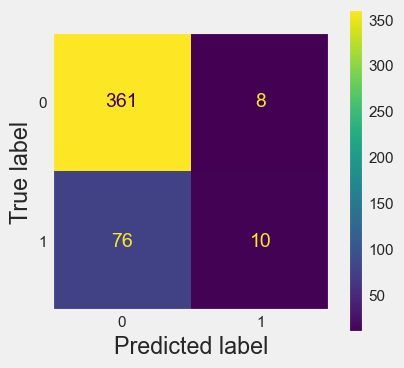

In [938]:
cm = confusion_matrix(ym_test, predsm)

disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.rcParams['figure.figsize']= 4,4
plt.grid(False)
plt.show()

# Confusion Matrix: | TN | FP |
#                   | FN | TP |

In [1029]:
tnm, fpm, fnm, tpm = confusion_matrix(ym_test, predsm).ravel()
print(tnm, fpm, fnm, tpm)

361 8 76 10


In [939]:
mcoefs = mlgr_grid.best_estimator_.coef_
mcoefs_df = pd.DataFrame(mcoefs, columns=Xm_train_scaled.keys())
print('Logistic Regression Grid Search Coefs: \n', mcoefs_df)

Logistic Regression Grid Search Coefs: 
         age  education  currentSmoker  cigsPerDay    BPMeds  prevalentStroke  \
0  0.301612  -0.000143       0.079625     0.08541  0.010247         0.053048   

   prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  heartRate  \
0      0.054053  0.063523  0.071677  0.193711  0.039556  0.004725   0.034815   

   glucose  
0  0.12443  


In [949]:
plt.rcParams['figure.figsize']= 6,4
mcoefs_df.sum().sort_values(ascending=False).round(4).plot(kind='bar',backend='plotly')

## <font color= green> SVM Grid </font> 

In [941]:
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']
C_range = range(1, 10, 2)
degree_range = range(1, 5)
max_iter_range = [100, 1000]

grid = dict(kernel = kernel_range,C=C_range, degree=degree_range, max_iter=max_iter_range)

mgrid_svm = GridSearchCV(estimator = SVC() 
                           ,param_grid = grid
                           ,n_jobs = -1
                           ,cv = 5
                           ,scoring ='recall')

mgrid_svm.fit(Xm_train_scaled, ym_train)

/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/liat/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: Conv

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(1, 10, 2), 'degree': range(1, 5),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [100, 1000]},
             scoring='recall')

In [942]:
best_mSVM_params = mgrid_svm.best_params_
print('M SVM grid search best params: ', best_mSVM_params)

M SVM grid search best params:  {'C': 1, 'degree': 4, 'kernel': 'poly', 'max_iter': 100}


In [1046]:
mpreds_svm = mgrid_svm.best_estimator_.predict(Xm_test_scaled)

msvm_mse = mean_squared_error(ym_test, mpreds_svm)
print('mse for M SVM grid = {:.4f}'.format(msvm_mse))
print("The accuracy score of the M SVM grid for Train is: {:.4f}".
      format(mgrid_svm.best_estimator_.score(Xm_train_scaled, ym_train)))
print("The accuracy score of the M SVM grid for Test is: {:.4f}".
      format(mgrid_svm.best_estimator_.score(Xm_test_scaled, ym_test)))
print('M SVM grid Recall score is : {:.4f}'.format(recall_score(ym_test, mpreds_svm)))

mse for M SVM grid = 0.8110
The accuracy score of the M SVM grid for Train is: 0.1950
The accuracy score of the M SVM grid for Test is: 0.1890
M SVM grid Recall score is : 0.9651


In [944]:
print(classification_report(ym_test,mpreds_svm))

              precision    recall  f1-score   support

           0       0.50      0.01      0.02       369
           1       0.18      0.97      0.31        86

    accuracy                           0.19       455
   macro avg       0.34      0.49      0.16       455
weighted avg       0.44      0.19      0.07       455



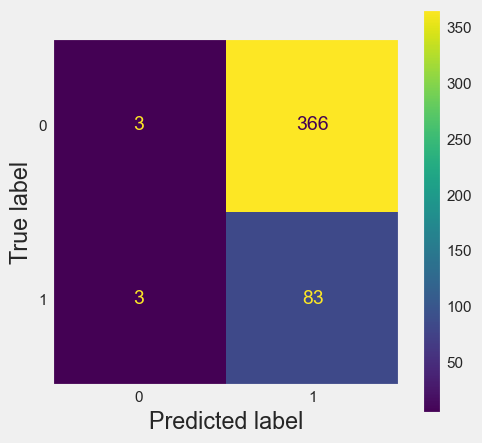

In [947]:
cm = confusion_matrix(ym_test, mpreds_svm)

plt.rcParams['figure.figsize']= 5,5
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

# Confusion Matrix: | TN | FP |
#                   | FN | TP |

In [1030]:
tnm2, fpm2, fnm2, tpm2 = confusion_matrix(ym_test, mpreds_svm).ravel()
print(tnm2, fpm2, fnm2, tpm2)

3 366 3 83


# <font color= darkblue>Summary of Results</font>

**Compare Accuracy and Recall between the 5 modles**

In [1075]:
summary_data={'Model':['Logistic Regression GridSearchCV','SVM GridSearchCV','KNN GridSearchCV',
                                'Decision Tree GridSearchCV','Random Forest'],
                      'mse':[lgr_mse,svm_mse,knn_grid_mse,dt_grid_mse,rf_mse],
                      'Train Accuracy':[lgr_grid.best_estimator_.score(X_train_scaled, y_train),
                                       grid_svm.best_estimator_.score(X_train_scaled, y_train),
                                       knn_grid.best_estimator_.score(X_train_scaled, y_train),
                                       dt_grid_search.best_estimator_.score(X_train, y_train),
                                       rf.score(X_train, y_train)],
                      'Test Accuracy':[lgr_grid.best_estimator_.score(X_test_scaled, y_test),
                                      grid_svm.best_estimator_.score(X_test_scaled, y_test),
                                      knn_grid.best_estimator_.score(X_test_scaled, y_test),
                                      dt_grid_search.best_estimator_.score(X_test, y_test), 
                                      rf.score(X_test, y_test)],
                      'Recall Score':[recall_score(y_test, preds), recall_score(y_test, preds_svm),
                                     recall_score(y_test, preds_knn), recall_score(y_test, preds_dt),
                                     recall_score(y_test, preds_rf)],
                      'TN, FP, FN, TP':[[tn1, fp1, fn1, tp1],[tn2, fp2, fn2, tp2],
                                       [tn3, fp3, fn3, tp3],[tn4, fp4, fn4, tp4],[tn5, fp5, fn5, tp5]]
             }

In [1076]:
summary = pd.DataFrame(summary_data)
summary.set_index('Model', inplace = True)
summary

mse  Train Accuracy  Test Accuracy  \
Model                                                                       
Logistic Regression GridSearchCV  0.148113        0.857143       0.851887   
SVM GridSearchCV                  0.838679        0.158905       0.161321   
KNN GridSearchCV                  0.223585        1.000000       0.776415   
Decision Tree GridSearchCV        0.157547        0.856514       0.842453   
Random Forest                     0.151887        1.000000       0.848113   

                                  Recall Score       TN, FP, FN, TP  
Model                                                                
Logistic Regression GridSearchCV      0.080745    [890, 9, 148, 13]  
SVM GridSearchCV                      0.900621   [26, 873, 16, 145]  
KNN GridSearchCV                      0.198758  [791, 108, 129, 32]  
Decision Tree GridSearchCV            0.055901    [884, 15, 152, 9]  
Random Forest                         0.062112   [889, 10, 151, 10]

The best test accuracy was achieved by the Logistic Regression model. The model that had the best recall score, and thus had the best prediction for the true positives with litlle false negatives, was SVM. For the grid searches, the scoring methos used was recall.

**Men and Women data analysis : MSE, Train & Test Accuracy, Recall Scores, Confusion Matrix scores**

In [1060]:
byGender_data = {'Model': ['Logistic Regression - Women', 'Logistic Regression - Men',
                           'SVM  - Women', 'SVM - Man'],
                 'mse':[wlgr_mse, mlgr_mse, wsvm_mse, msvm_mse],
                      'Train Accuracy':[wlgr_grid.best_estimator_.score(Xw_train_scaled, yw_train),
                                       mlgr_grid.best_estimator_.score(Xm_train_scaled, ym_train),
                                       wgrid_svm.best_estimator_.score(Xw_train_scaled, yw_train),
                                       mgrid_svm.best_estimator_.score(Xm_train_scaled, ym_train)],
                      'Test Accuracy':[wlgr_grid.best_estimator_.score(Xw_test_scaled, yw_test),
                                      mlgr_grid.best_estimator_.score(Xm_test_scaled, ym_test),
                                      wgrid_svm.best_estimator_.score(Xw_test_scaled, yw_test),
                                      mgrid_svm.best_estimator_.score(Xm_test_scaled, ym_test)],
                      'Recall Score':[recall_score(yw_test, predsw),recall_score(ym_test, predsm),
                                     recall_score(yw_test, predsw_svm),recall_score(ym_test, mpreds_svm)],
                      'TN, FP, FN, TP':[[tnw, fpw, fnw, tpw],[tnm, fpm, fnm, tpm],
                                       [tnw2, fpw2, fnw2, tpw2],[tnm2, fpm2, fnm2, tpm2]]
                }

In [1061]:
byGender_data = pd.DataFrame(byGender_data)

In [1074]:
#byGender_data.style.set_properties(subset=['Model'],**{'text-align': 'left'})

In [1063]:
byGender_data.set_index('Model', inplace = True)
byGender_data

mse  Train Accuracy  Test Accuracy  \
Model                                                                  
Logistic Regression - Women  0.125620        0.878721       0.874380   
Logistic Regression - Men    0.184615        0.820381       0.815385   
SVM  - Women                 0.869421        0.125689       0.130579   
SVM - Man                    0.810989        0.195015       0.189011   

                             Recall Score    TN, FP, FN, TP  
Model                                                        
Logistic Regression - Women      0.013333   [528, 2, 74, 1]  
Logistic Regression - Men        0.116279  [361, 8, 76, 10]  
SVM  - Women                     0.933333   [9, 521, 5, 70]  
SVM - Man                        0.965116   [3, 366, 3, 83]

SVM model achieved better recall score, and better number for fn,tp, for analyzing separately men and women data.

In [1077]:
#byGender_data.style.set_properties(subset=[index],**{'text-align': 'left'})
# Indentation does not work for index

**Comparison between Features Importance Receive from Logistic Regression, Decision Tree
and Random Forest models**

In [961]:
# LGR:
coefs_df

male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0  0.205515  0.541378   0.011574      -0.050327    0.310868  0.045063   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP    diaBP  \
0          0.11172      0.091477  0.071242  0.069683  0.271104  0.05281   

        BMI  heartRate   glucose  
0 -0.047787  -0.014702  0.091976

In [766]:
# Decision Tree
#dt_importances_df_T = dt_importances_df.T
dt_importances_df

male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0  0.202282  0.527761   0.009222      -0.038483    0.294367  0.045115   

   prevalentStroke  prevalentHyp  diabetes  totChol     sysBP     diaBP  \
0         0.110268      0.094487  0.071086  0.06959  0.264436  0.055051   

        BMI  heartRate  glucose  
0 -0.045098  -0.014177  0.09109

In [772]:
# Random Forest
importances_rf = pd.DataFrame(importances_rf)
#importances_rf
importances_rf_T = importances_rf.T
importances_rf_T

male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0  0.020228  0.120142   0.040403        0.01284     0.05168  0.008332   

   prevalentStroke  prevalentHyp  diabetes  totChol    sysBP     diaBP  \
0         0.005505      0.017632  0.007096  0.12424  0.13419  0.116297   

        BMI  heartRate   glucose  
0  0.127448   0.096098  0.117869

In [792]:
coef_data_df = pd.concat([coefs_df, dt_importances_df, importances_rf_T])
coef_d
ata_df

male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0  0.205515  0.541378   0.011574      -0.050327    0.310868  0.045063   
0  0.202282  0.527761   0.009222      -0.038483    0.294367  0.045115   
0  0.020228  0.120142   0.040403       0.012840    0.051680  0.008332   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0         0.111720      0.091477  0.071242  0.069683  0.271104  0.052810   
0         0.110268      0.094487  0.071086  0.069590  0.264436  0.055051   
0         0.005505      0.017632  0.007096  0.124240  0.134190  0.116297   

        BMI  heartRate   glucose  
0 -0.047787  -0.014702  0.091976  
0 -0.045098  -0.014177  0.091090  
0  0.127448   0.096098  0.117869

In [795]:
coef_data_df.index = ['Logistic Regression','Decision Tree','Random Forest']
coef_data_df

male       age  education  currentSmoker  cigsPerDay  \
Logistic Regression  0.205515  0.541378   0.011574      -0.050327    0.310868   
Decision Tree        0.202282  0.527761   0.009222      -0.038483    0.294367   
Random Forest        0.020228  0.120142   0.040403       0.012840    0.051680   

                       BPMeds  prevalentStroke  prevalentHyp  diabetes  \
Logistic Regression  0.045063         0.111720      0.091477  0.071242   
Decision Tree        0.045115         0.110268      0.094487  0.071086   
Random Forest        0.008332         0.005505      0.017632  0.007096   

                      totChol     sysBP     diaBP       BMI  heartRate  \
Logistic Regression  0.069683  0.271104  0.052810 -0.047787  -0.014702   
Decision Tree        0.069590  0.264436  0.055051 -0.045098  -0.014177   
Random Forest        0.124240  0.134190  0.116297  0.127448   0.096098   

                      glucose  
Logistic Regression  0.091976  
Decision Tree        0.091090  
Random Forest        0.117869

Text(0.5, 1.0, 'Leading Factors for Cardivascular Disease in Patients, Three Models Results')

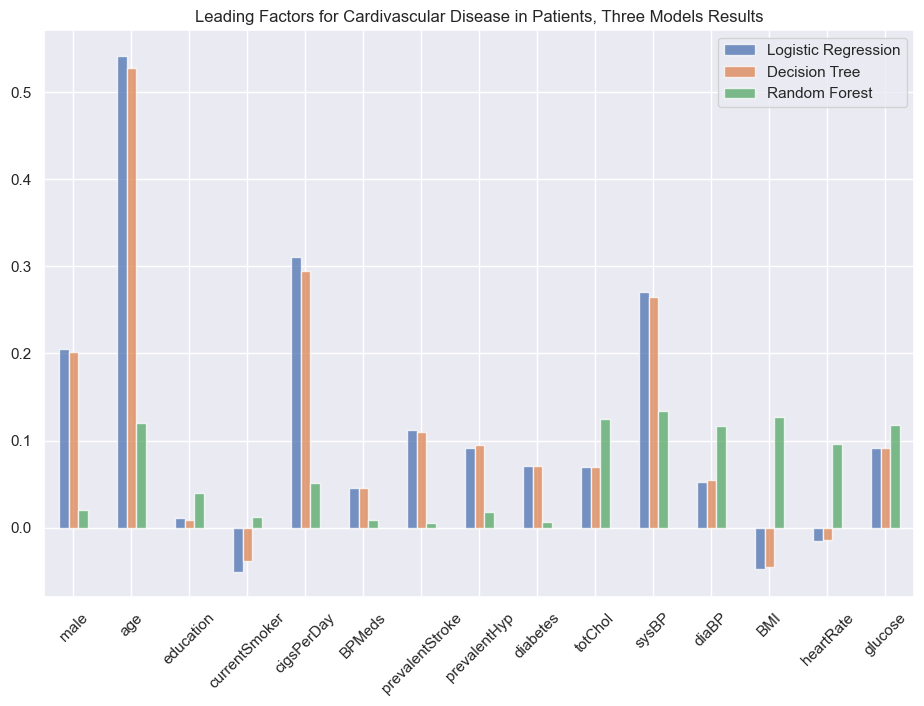

In [1100]:
coef_data_df_T = coef_data_df.T
#plt.rcParams['figure.figsize']= 10,7
coef_data_df_T.plot(kind = 'bar', alpha=0.75, rot=45)
plt.title('Leading Factors for Cardivascular Disease in Patients, Three Models Results')

**Comparing Logistic Regression Coefficients for the Men and Women Datasets**

In [950]:
coef_byGender_df = pd.concat([wcoefs_df, mcoefs_df])
coef_byGender_df

age  education  currentSmoker  cigsPerDay    BPMeds  prevalentStroke  \
0  0.230507  -0.040203       0.001275    0.102091  0.052968         0.074157   
0  0.301612  -0.000143       0.079625    0.085410  0.010247         0.053048   

   prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  heartRate  \
0      0.096185  0.039331  0.034087  0.154492 -0.010861 -0.002144  -0.002869   
0      0.054053  0.063523  0.071677  0.193711  0.039556  0.004725   0.034815   

    glucose  
0  0.088987  
0  0.124430

In [951]:
coef_byGender_df.index = ['Women','Men']
coef_byGender_df

age  education  currentSmoker  cigsPerDay    BPMeds  \
Women  0.230507  -0.040203       0.001275    0.102091  0.052968   
Men    0.301612  -0.000143       0.079625    0.085410  0.010247   

       prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
Women         0.074157      0.096185  0.039331  0.034087  0.154492 -0.010861   
Men           0.053048      0.054053  0.063523  0.071677  0.193711  0.039556   

            BMI  heartRate   glucose  
Women -0.002144  -0.002869  0.088987  
Men    0.004725   0.034815  0.124430

Text(0.5, 1.0, 'Logistic Regression Model Features coef Comparison between Women and Men Datasets')

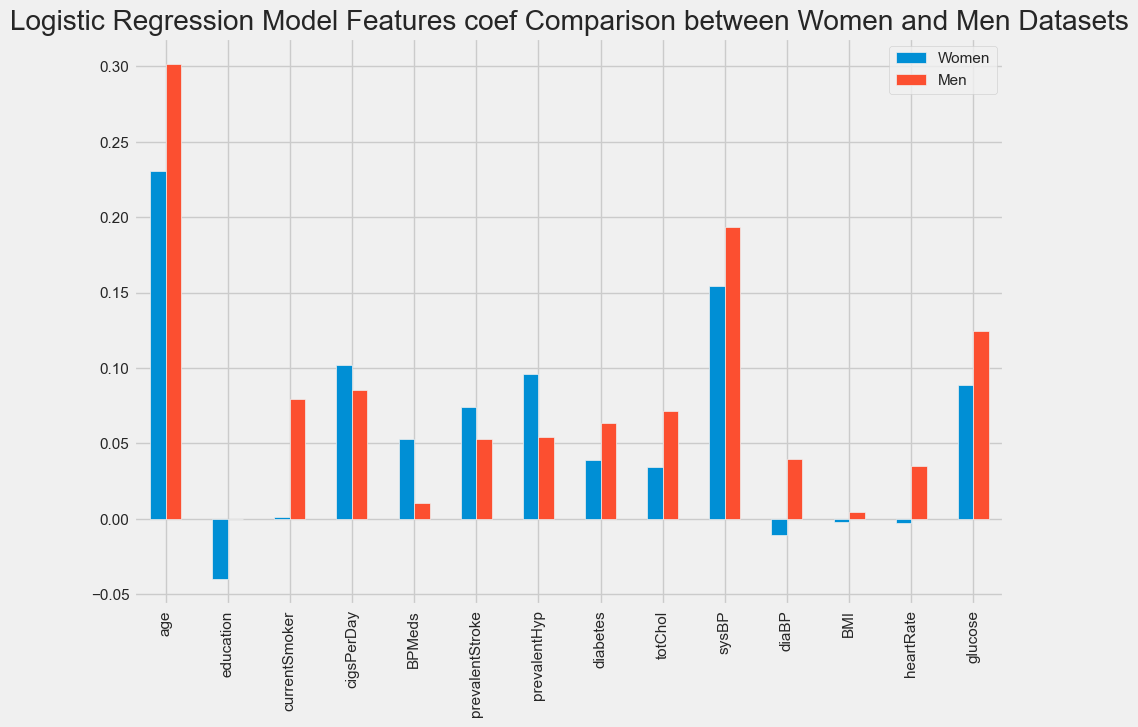

In [952]:
coef_byGender_df_T = coef_byGender_df.T
plt.rcParams['figure.figsize']= 10,7
coef_byGender_df_T.plot(kind = 'bar')
plt.title('Logistic Regression Model Features coef Comparison between Women and Men Datasets')

From this comparison we see that the leading factors for predicting heart disease are the same in order and differ in magnitude between men and women. We see the same order of significance in the general population dataset as well, though with variance in values.

**Comparison of SVM model recall values, between the general dataset and the women and men datasets:**

In [955]:
SVM_recall = {'All population': [recall_score(y_test, preds_svm)],
             'Women': [recall_score(yw_test, predsw_svm)],
             'men': [recall_score(ym_test, mpreds_svm)]}

In [960]:
SVM_recall = pd.DataFrame(SVM_recall)
SVM_recall.index = ['SVM Recall Score']
SVM_recall

All population     Women       men
SVM Recall Score        0.900621  0.933333  0.965116

# <font color= darkblue>Summary and Findings</font>

In this work I have analyzed the Framingham study dataset using machine learning tools. This study is committed to identifying the common factors or characteristics that contribute to cardiovascular disease (CVD). It followed CVD development over a long period of time in three generations of participants (originally from the town of Framingham Massachusetts).

My goal was to find a modelthat can accurately predict if a patient will have CVD within 10 years, and to know what are the leading factors to get those family of diseases.

Cardiovascular diseases (CVDs) are the leading cause of death globally. An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.
(Source: The World Health Organization Website)

This dataset contains 4238 entries, with 15 numeric features, and the target being the chance to get a cardio vascular disease within 10 years (TenYearCHD). Study population are adults aged 32-70 years, with 57.08% women participating and 42.92% men.

I used five classifying models: Logistic Regression,SVM (Support Vector Machine), KNN (k-nearest neighbors), Decision Tree, and Random Forest.

My aim was to find a model that can most accurately predict the true positive patients (TenYearCHD = 1), with the lowest number of false negatives. Thus the recall score was the important measure for the model performance, and was used as the scoring method in GridSearchCV.

**SVM model did the best in predicting maximum true positive patients with the minimum false negatives, thus having the best recall score of 90.06%. This came with a low test accuracy of 16.13%. KNN model came second with a recall score of 19.88%.**

Best test accuracy score was achieved by the Logistic Regression model, 85.19%, which is only by little better than the dummy classifier. This can be explained by a relatively weak correlation between each of the dataset's 15 features and the target.

**From separately analyzing and modeling the women and men data, and from comparing results with the general population dataset, I saw that better recall scores can be achieved by analyzing women and men data separately. The numbers for true positives and false negative were better.**

**Leading factors for predicting heart disease within 10 years are: age, cigarettes per day, systolic blood pressure, being male, prevalent stroke, and blood glucose levels.
Those leading predicting factors are similar, but do not completely overlap in order and in magnitude with the separate analysis for the men and women data.**

**From this I learn that the studies and focus on predicting factors for heart disease can have better accuracy and predictive power when are conducted separately for men and women.**

#  <font color= darkblue>Conclusions and Suggestions for Next Steps:</font>

* **My conclusion from the the modeling results is to give care providers a recommendation to treat much broader base of patients. When a model got it right predicting future CVD patients, it predicted a lot of false positives. When the accuracy was better with Logistic Regression model, it missed a lot of patients prone to have CVD. Risk for CVD is quite high as it is - 15%, and this is a condition that can be deadly when first appears, so any patient predicted to be at risk should be treated.** 

* **Leading factors for predicting heart disease within 10 years are: age, cigarettes per day, systolic blood pressure, being male, prevalent stroke, and blood glucose levels.**

* **Modeling separately by gender gave better results and better predictive power. Thus my recommendation for care providers is treat men and women differently. Future research for the development of medications and diagnosis tools should be conducted in that view, so it is better targeted and accurate.**